# Exploratory data analysis (EDA)

This notebook is to cover the initial exploratory data analysis of both the ICU and Hospital Datasets. The purposes of this is to uncover any trends within the data before the data is analyzed at a deeper level.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
# pd.set_option('max_columns',200)

In [2]:
# Load Datasets

# ICU Datasets
chart_events=pd.read_csv('../data/icu/chartevents.csv')
# Information about chart creation
date_time_events=pd.read_csv('../data/icu/datetimeevents.csv')
# Information about chart creation (Time)
icu_stays=pd.read_csv('../data/icu/icustays.csv')
# ICU Stay data
ingredient_events=pd.read_csv('../data/icu/ingredientevents.csv')
# provides context for ingredients used
input_events=pd.read_csv('../data/icu/inputevents.csv')
# provides input events context
output_events=pd.read_csv('../data/icu/outputevents.csv')
# Provides output events context
procedure_events=pd.read_csv('../data/icu/procedureevents.csv')
# Provides context for procedure events
d_items=pd.read_csv('../data/icu/d_items.csv')
# Provide addition context for resources used


# Hospital Datasets
patients=pd.read_csv('../data/hosp/patients.csv')
# Patient data
admissions=pd.read_csv('../data/hosp/admissions.csv')
# Admission data
diagnoses=pd.read_csv(r"../data/hosp/diagnoses_icd.csv.gz")
# Patient diagnoses data
diagnoses_code=pd.read_csv('../data/hosp/d_icd_diagnoses.csv')
#diagnoses codes
procedure=pd.read_csv(r"../data/hosp/diagnoses_icd.csv.gz")
#Procedure Codes
procedure_code=pd.read_csv('../data/hosp/d_icd_procedures.csv')

#merging procedures and diagnoses with their respective codes
mh_procedure=procedure.merge(procedure_code,on=['icd_code', 'icd_version'], how='inner')
mh_diagoneses=diagnoses.merge(diagnoses_code, on=['icd_code','icd_version'], how='inner')

# Data Understanding

Basic understanding of datasets
* Dataframe shape
Shape of the dataframe. How many rows and columns (Rows,Columns)

* Dataframe head and tail
First and last five rows of the dataframe

* Dataframe columns
All the columns in the dataframe listed

* Dtypes
What type of data is stored in the column

* Describe
Provides a statistical description of the numeric data in the dataset.

#### Data understanding will be seperated by granularity. ICU level and then hospital level

## ICU Datasets

### Chart events (Data understanding)

In [3]:
chart_events.shape

(668862, 11)

In [4]:
chart_events.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:45:00,225054,On,NaN,NaN,0.0
1,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:43:00,223769,100,100.0,%,0.0
2,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,223956,Atrial demand,NaN,NaN,0.0
3,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:47:00,224866,Yes,NaN,NaN,0.0
4,10005817,20626031,32604416,6770.0,2132-12-16 00:00:00,2132-12-15 23:45:00,227341,No,0.0,NaN,0.0


In [5]:
chart_events.tail()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
668857,10019003,29279905,34107647,60023.0,2153-03-28 10:49:28,NaN,220001,.Care Plan - Infection,NaN,NaN,NaN
668858,10019003,29279905,34107647,60023.0,2153-03-28 10:49:28,NaN,220001,"Diabetes Mellitus (DM), Type II",NaN,NaN,NaN
668859,10019003,29279905,34107647,60023.0,2153-03-28 10:49:28,NaN,220001,.Care Plan - Coping,NaN,NaN,NaN
668860,10019003,29279905,34107647,60023.0,2153-03-28 10:49:28,NaN,220001,"Chronic obstructive pulmonary disease (COPD, B...",NaN,NaN,NaN
668861,10019003,29279905,34107647,60023.0,2153-03-28 10:49:28,NaN,220001,.Care Plan - Alteration in Bowel Elimination: ...,NaN,NaN,NaN


In [6]:
chart_events.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'charttime',
       'storetime', 'itemid', 'value', 'valuenum', 'valueuom', 'warning'],
      dtype='object')

In [7]:
chart_events.dtypes

subject_id        int64
hadm_id           int64
stay_id           int64
caregiver_id    float64
charttime        object
storetime        object
itemid            int64
value            object
valuenum        float64
valueuom         object
warning         float64
dtype: object

In [8]:
chart_events.describe()

,subject_id,hadm_id,stay_id,caregiver_id,itemid,valuenum,warning
count,6.688620e+05,6.688620e+05,6.688620e+05,644622.000000,668862.000000,257474.000000,667703.000000
mean,1.001847e+07,2.516755e+07,3.479388e+07,50398.010586,224936.797600,74.429325,0.021854
std,1.195069e+04,3.053518e+06,2.905517e+06,28373.552679,2882.504158,3035.925908,0.146207
min,1.000003e+07,2.004459e+07,3.005745e+07,199.000000,220001.000000,-400.000000,0.000000
25%,1.000782e+07,2.249049e+07,3.235958e+07,26642.000000,223876.000000,2.000000,0.000000
50%,1.001900e+07,2.454084e+07,3.457802e+07,51306.000000,224562.000000,19.000000,0.000000
75%,1.002744e+07,2.825813e+07,3.729340e+07,75774.000000,227954.000000,86.450000,0.000000
max,1.004002e+07,2.997458e+07,3.988077e+07,99850.000000,229858.000000,999999.000000,1.000000


In [9]:
chart_events['warning'].nunique()

2

In [10]:
chart_events['subject_id'].nunique()

100

#### Chart Event Summary:
The chart event dataframe contains 668862 rows and 11 columns of data.

The unique identifiers are all integers. Numbers provide no statistical significant data:
* Subject_id
* hadm_id
* stay_id
* caregiver_id
* item_id 

Value and valuenum don't provide much information due to the fact that multiple data types are stored in the columns 

Warning has two different data types, 0 and 1. Based on this 1 means a warning was issued for the patient and 0 means this patient didn't have a warning. (EXPAND, what warning means)

The main two values that are important are the chart time (when the chart was created and the store time)

These two values are important because the time a chart takes could affect the service a patient receives and every second is crucial in the ICU. This could be a potential area for improvement

### Date time events (Data understanding)

In [11]:
date_time_events.shape

(15280, 10)

In [12]:
date_time_events.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom,warning
0,10002428,23473524,35479615,29441,2156-05-15 10:50:00,2156-05-15 10:50:00,225343,2156-05-11 00:00:00,Date,0
1,10002428,23473524,35479615,29441,2156-05-15 10:50:00,2156-05-15 10:50:00,225348,2156-05-11 00:00:00,Date,0
2,10002428,23473524,35479615,29441,2156-05-15 10:50:00,2156-05-15 10:50:00,225345,2156-05-14 09:00:00,Date and Time,0
3,10002428,23473524,35479615,29441,2156-05-15 09:00:00,2156-05-15 10:51:00,224186,2156-05-15 09:00:00,Date and Time,0
4,10002428,23473524,35479615,29441,2156-05-15 09:00:00,2156-05-15 10:51:00,224187,2156-05-15 10:50:00,Date,0


In [13]:
date_time_events.tail()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom,warning
15275,10016742,29281842,37057036,82943,2178-07-07 08:00:00,2178-07-07 09:37:00,225754,2178-07-06 00:00:00,Date,0
15276,10016742,29281842,37057036,82943,2178-07-07 12:00:00,2178-07-07 14:03:00,224187,2178-07-07 14:03:00,Date,0
15277,10016742,29281842,37057036,82943,2178-07-07 12:00:00,2178-07-07 14:03:00,224184,2178-07-07 14:03:00,Date,0
15278,10016742,29281842,37057036,82943,2178-07-07 12:00:00,2178-07-07 14:03:00,224183,2178-07-07 14:03:00,Date,0
15279,10016742,29281842,37057036,82943,2178-07-07 12:00:00,2178-07-07 14:03:00,224186,2178-07-07 12:30:00,Date and Time,0


In [14]:
date_time_events.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'charttime',
       'storetime', 'itemid', 'value', 'valueuom', 'warning'],
      dtype='object')

In [15]:
date_time_events.dtypes

subject_id       int64
hadm_id          int64
stay_id          int64
caregiver_id     int64
charttime       object
storetime       object
itemid           int64
value           object
valueuom        object
warning          int64
dtype: object

In [16]:
date_time_events.describe()

,subject_id,hadm_id,stay_id,caregiver_id,itemid,warning
count,1.528000e+04,1.528000e+04,1.528000e+04,15280.000000,15280.000000,15280.000000
mean,1.001916e+07,2.537485e+07,3.469145e+07,49543.381806,225142.711191,0.000131
std,1.245684e+04,3.085806e+06,2.853064e+06,28234.565862,1405.718675,0.011440
min,1.000003e+07,2.004459e+07,3.005745e+07,199.000000,224183.000000,0.000000
25%,1.000782e+07,2.298711e+07,3.235958e+07,26395.000000,224279.000000,0.000000
50%,1.001978e+07,2.498243e+07,3.453156e+07,51111.000000,224288.000000,0.000000
75%,1.002760e+07,2.825813e+07,3.729340e+07,73338.000000,225754.000000,0.000000
max,1.004002e+07,2.997458e+07,3.988077e+07,99850.000000,229739.000000,1.000000


In [17]:
date_time_events['subject_id'].nunique()

100

#### Date Time events summary

The Date_Time_events dataset has 15280 rows and 10 columns.

Majority of the data o this dataset is repeat of the the chart event dataset.

### ICU Stay

In [18]:
icu_stays.shape

(140, 8)

In [19]:
icu_stays.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,in_time,out_time,los
0,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,4/24/2154 23:03,5/2/2154 15:55,7.702512
1,10020187,24104168,37509585,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,1/15/2169 4:56,1/20/2169 15:47,5.452662
2,10020187,26842957,32554129,Neuro Intermediate,Neuro Intermediate,2/24/2170 18:18,2/25/2170 15:15,0.872685
3,10012853,27882036,31338022,Trauma SICU (TSICU),Trauma SICU (TSICU),11/26/2176 2:34,11/29/2176 20:58,3.766725
4,10020740,25826145,32145159,Trauma SICU (TSICU),Trauma SICU (TSICU),6/3/2150 20:12,6/4/2150 21:05,1.037106


In [20]:
icu_stays['subject_id'].nunique()

100

In [21]:
icu_stays['stay_id'].nunique()

140

In [22]:
icu_stays.tail()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,in_time,out_time,los
135,10020786,23488445,33683112,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),6/9/2189 12:46,6/10/2189 22:58,1.424757
136,10020740,23831430,35026312,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),3/11/2150 15:34,3/19/2150 2:17,7.446424
137,10032725,20611640,30101877,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),3/22/2143 6:42,3/25/2143 15:05,3.349687
138,10037928,24656677,39804682,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),12/21/2178 6:05,12/22/2178 2:16,0.840856
139,10015931,22130791,37093652,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),3/24/2177 21:48,3/29/2177 18:03,4.844086


In [23]:
icu_stays.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'in_time', 'out_time', 'los'],
      dtype='object')

In [24]:
icu_stays.dtypes

subject_id          int64
hadm_id             int64
stay_id             int64
first_careunit     object
last_careunit      object
in_time            object
out_time           object
los               float64
dtype: object

In [25]:
icu_stays.describe()

,subject_id,hadm_id,stay_id,los
count,1.400000e+02,1.400000e+02,1.400000e+02,140.000000
mean,1.001856e+07,2.515013e+07,3.510255e+07,3.679379
std,1.085782e+04,2.929135e+06,2.823925e+06,3.896354
min,1.000003e+07,2.004459e+07,3.005745e+07,0.023727
25%,1.000905e+07,2.272480e+07,3.250364e+07,1.170663
50%,1.001900e+07,2.483705e+07,3.513752e+07,2.155093
75%,1.002384e+07,2.790758e+07,3.730093e+07,4.907749
max,1.004002e+07,2.997458e+07,3.988077e+07,20.528681


In [26]:
icu_stays['subject_id'].nunique()

100

In [27]:
icu_stays['stay_id'].nunique()

140

#### ICU Stay summary

ICU_stay data set contains 140 rows and 8 columns

First and last care unit is what unit the patient is at.

In_time is the admitted to the ICU
Out_time is when the patient was discharged
LOS (Length of stay) is the total time a patient spent in the ICU.

The main characteristic is the LOS and the in_time. The length of stay is a variable that we want to look for any correlation in.
The in_time (Potentially more staff on hand/quality of staff), (Potentially a peak intake time causing for lower response time from staff)


# IMPORTANT

### Total Number of patients (Subject) 100
### Total number of stays 140
### Patients could have returned to the ICU

### Ingredient events data understanding

In [28]:
ingredient_events.shape

(25728, 17)

In [29]:
ingredient_events.head()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,rate,rateuom,orderid,linkorderid,statusdescription,originalamount,originalrate
0,10005817,20626031,32604416,4793,2132-12-17 05:00:00,2132-12-17 06:00:00,2132-12-17 06:01:00,227074,49.999999,ml,50.000000,mL/hour,7330951,7330951,FinishedRunning,0,50.000000
1,10005817,20626031,32604416,4793,2132-12-17 05:00:00,2132-12-17 06:00:00,2132-12-17 06:01:00,220490,49.999999,ml,50.000000,mL/hour,7330951,7330951,FinishedRunning,0,50.000000
2,10005817,20626031,32604416,20310,2132-12-17 12:00:00,2132-12-17 13:00:00,2132-12-17 12:48:00,220490,249.999990,ml,249.999985,mL/hour,5334154,5334154,FinishedRunning,0,250.000000
3,10005817,20626031,32604416,20310,2132-12-17 12:00:00,2132-12-17 13:00:00,2132-12-17 12:48:00,226509,249.999990,ml,249.999985,mL/hour,5334154,5334154,FinishedRunning,0,250.000000
4,10005817,20626031,32604416,92805,2132-12-15 16:35:00,2132-12-15 18:00:00,2132-12-15 16:42:00,220490,38.852669,ml,27.425413,mL/hour,1386365,3042892,ChangeDose/Rate,0,47.080292


In [30]:
ingredient_events.tail()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,rate,rateuom,orderid,linkorderid,statusdescription,originalamount,originalrate
25723,10019003,29279905,34107647,68979,2153-03-28 21:58:00,2153-03-28 22:58:00,2153-03-28 23:22:00,227074,49.999999,ml,50.0,mL/hour,6547485,6547485,FinishedRunning,0,50.0
25724,10019003,29279905,34107647,68979,2153-03-28 02:58:00,2153-03-28 02:59:00,2153-03-28 02:58:00,227075,120.000000,ml,NaN,NaN,103707,103707,FinishedRunning,0,120.0
25725,10019003,29279905,34107647,68979,2153-03-28 02:58:00,2153-03-28 02:59:00,2153-03-28 02:58:00,220490,120.000000,ml,NaN,NaN,103707,103707,FinishedRunning,0,120.0
25726,10019003,29279905,34107647,88156,2153-03-29 20:58:00,2153-03-29 20:59:00,2153-03-29 20:58:00,220490,500.000000,ml,NaN,NaN,9142525,9142525,FinishedRunning,0,500.0
25727,10019003,29279905,34107647,88156,2153-03-29 20:58:00,2153-03-29 20:59:00,2153-03-29 20:58:00,227074,500.000000,ml,NaN,NaN,9142525,9142525,FinishedRunning,0,500.0


In [31]:
ingredient_events.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'starttime',
       'endtime', 'storetime', 'itemid', 'amount', 'amountuom', 'rate',
       'rateuom', 'orderid', 'linkorderid', 'statusdescription',
       'originalamount', 'originalrate'],
      dtype='object')

In [32]:
ingredient_events.dtypes

subject_id             int64
hadm_id                int64
stay_id                int64
caregiver_id           int64
starttime             object
endtime               object
storetime             object
itemid                 int64
amount               float64
amountuom             object
rate                 float64
rateuom               object
orderid                int64
linkorderid            int64
statusdescription     object
originalamount         int64
originalrate         float64
dtype: object

In [33]:
ingredient_events.describe()

,subject_id,hadm_id,stay_id,caregiver_id,itemid,amount,rate,orderid,linkorderid,originalamount,originalrate
count,2.572800e+04,2.572800e+04,2.572800e+04,25728.000000,25728.000000,25728.000000,16643.000000,2.572800e+04,2.572800e+04,25728.0,25728.000000
mean,1.001897e+07,2.520668e+07,3.488540e+07,49979.304765,223985.397505,170.085190,200.909678,5.009024e+06,4.936753e+06,0.0,232.826054
std,1.240851e+04,3.055446e+06,2.897052e+06,28665.474362,3142.862413,782.826508,970.721653,2.908075e+06,2.894828e+06,0.0,792.850462
min,1.000003e+07,2.004459e+07,3.005745e+07,199.000000,220363.000000,0.000000,0.000000,1.974000e+03,1.974000e+03,0.0,0.000000
25%,1.000605e+07,2.242920e+07,3.235958e+07,25898.000000,220490.000000,14.393901,5.542756,2.477832e+06,2.416018e+06,0.0,49.999873
50%,1.001900e+07,2.454084e+07,3.453156e+07,50539.000000,226060.000000,49.999999,19.218403,4.995201e+06,4.864789e+06,0.0,100.000000
75%,1.002760e+07,2.825813e+07,3.729340e+07,76079.000000,227074.000000,120.000000,50.000000,7.554331e+06,7.405790e+06,0.0,233.000401
max,1.004002e+07,2.997458e+07,3.988077e+07,99791.000000,227079.000000,25000.001907,49107.139587,9.999948e+06,9.999948e+06,0.0,25000.000000


#### Ingredient events summary

Contains (25728 rows and 17 columns)

Dataset is about what medicines the caregiver ordered for the patient, the dosage and when the medicine was created.

The main variables in the ingredient events is the starttime, endtime and storetime. 
With these variables you are looking at how fast the hospitals pharmacy is able to produce the patients medicine. 

### Input Events

In [34]:
input_events.shape

(20404, 26)

In [35]:
input_events.head()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate
0,10005817,20626031,32604416,4793,2132-12-16 19:50:00,2132-12-16 19:51:00,2132-12-16 19:50:00,225798,1.0,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.0,1.000000
1,10005817,20626031,32604416,92805,2132-12-15 20:15:00,2132-12-15 20:16:00,2132-12-15 20:11:00,225798,1.0,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.0,1.000000
2,10005817,20626031,32604416,20310,2132-12-17 09:15:00,2132-12-17 09:16:00,2132-12-17 09:28:00,225798,1.0,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.0,1.000000
3,10005817,20626031,32604416,79166,2132-12-16 09:36:00,2132-12-16 09:37:00,2132-12-16 09:37:00,225798,1.0,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.0,1.000000
4,10005817,20626031,32604416,92805,2132-12-15 20:10:00,2132-12-15 21:10:00,2132-12-15 20:10:00,221456,2.0,grams,...,Additives ...,Continuous IV,91.0,100.0,ml,0,0,FinishedRunning,2.0,0.033333


In [36]:
input_events.tail()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate
20399,10019003,29279905,34107647,88156,2153-03-29 20:58:00,2153-03-29 20:59:00,2153-03-29 20:58:00,221385,0.500000,mg,...,Main order parameter,Drug Push,96.0,NaN,NaN,0,0,FinishedRunning,0.500000,0.50
20400,10019003,29279905,34107647,83144,2153-03-30 00:00:00,2153-03-30 00:01:00,2153-03-30 01:24:00,221385,0.500000,mg,...,Main order parameter,Drug Push,96.0,NaN,NaN,0,0,FinishedRunning,0.500000,0.50
20401,10019003,29279905,34107647,68979,2153-03-28 02:57:00,2153-03-28 04:48:00,2153-03-28 02:58:00,221906,0.319770,mg,...,Main order parameter,Continuous Med,96.0,250.0,ml,0,0,ChangeDose/Rate,8.000000,0.03
20402,10019003,29279905,34107647,68979,2153-03-28 06:05:00,2153-03-28 08:00:00,2153-03-28 06:11:00,221906,0.110377,mg,...,Main order parameter,Continuous Med,96.0,250.0,ml,0,0,Paused,7.532536,0.01
20403,10019003,29279905,34107647,68979,2153-03-28 04:48:00,2153-03-28 06:05:00,2153-03-28 06:11:00,221906,0.147810,mg,...,Main order parameter,Continuous Med,96.0,250.0,ml,0,0,ChangeDose/Rate,7.680346,0.02


In [37]:
input_events.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'starttime',
       'endtime', 'storetime', 'itemid', 'amount', 'amountuom', 'rate',
       'rateuom', 'orderid', 'linkorderid', 'ordercategoryname',
       'secondaryordercategoryname', 'ordercomponenttypedescription',
       'ordercategorydescription', 'patientweight', 'totalamount',
       'totalamountuom', 'isopenbag', 'continueinnextdept',
       'statusdescription', 'originalamount', 'originalrate'],
      dtype='object')

In [38]:
input_events.dtypes

subject_id                         int64
hadm_id                            int64
stay_id                            int64
caregiver_id                       int64
starttime                         object
endtime                           object
storetime                         object
itemid                             int64
amount                           float64
amountuom                         object
rate                             float64
rateuom                           object
orderid                            int64
linkorderid                        int64
ordercategoryname                 object
secondaryordercategoryname        object
ordercomponenttypedescription     object
ordercategorydescription          object
patientweight                    float64
totalamount                      float64
totalamountuom                    object
isopenbag                          int64
continueinnextdept                 int64
statusdescription                 object
originalamount  

In [39]:
input_events.describe()

,subject_id,hadm_id,stay_id,caregiver_id,itemid,amount,rate,orderid,linkorderid,patientweight,totalamount,isopenbag,continueinnextdept,originalamount,originalrate
count,2.040400e+04,2.040400e+04,2.040400e+04,20404.000000,20404.000000,20404.000000,11038.000000,2.040400e+04,2.040400e+04,20404.000000,17090.000000,20404.000000,20404.0,20404.000000,20404.000000
mean,1.001907e+07,2.527536e+07,3.492459e+07,49943.360910,224275.310331,184.940064,72.634920,4.997422e+06,4.927481e+06,86.040737,216.914593,0.000147,0.0,318.421415,82.795722
std,1.236290e+04,3.051399e+06,2.922793e+06,28798.125051,2237.679041,1072.228220,1023.510449,2.906358e+06,2.895746e+06,24.096068,283.566500,0.012125,0.0,1834.743017,783.270246
min,1.000003e+07,2.004459e+07,3.005745e+07,199.000000,220862.000000,0.000000,0.000000,1.974000e+03,1.974000e+03,39.400000,2.000000,0.000000,0.0,0.000000,0.000000
25%,1.000780e+07,2.242920e+07,3.235958e+07,25898.000000,221906.000000,2.000000,2.025446,2.472696e+06,2.407207e+06,69.000000,87.300003,0.000000,0.0,9.000000,1.000000
50%,1.001917e+07,2.454736e+07,3.457740e+07,48954.000000,225158.000000,24.999999,12.580626,4.978834e+06,4.869153e+06,86.200000,100.000000,0.000000,0.0,55.413124,9.756786
75%,1.002760e+07,2.825813e+07,3.764896e+07,76079.000000,225942.000000,100.000000,50.000000,7.535340e+06,7.404947e+06,99.600000,250.000000,0.000000,0.0,200.000000,50.000000
max,1.004002e+07,2.997458e+07,3.988077e+07,99791.000000,229654.000000,25000.002088,75000.015625,9.999948e+06,9.999948e+06,143.000000,6500.000000,1.000000,0.0,25000.001953,75000.007812


#### Input events summary

Based on the data there are a couple key variables that can be pulled.

Patient weight (affects dosage), amount, amountuom (unit of measure). See if the hospital is effectively administering medicines. Could be administering too much (law of diminiishing returns) which would lead to inefficeint use of resources and could inadvertly harm patient. Or too little which might not have a strong effect and could prolong recovery time.

Starttime, endtime and storetime. (Did the hospital staff start treatement as soon as possible? could the reduce delay lead to a shorter los (length of stay)


### Procedure events

In [40]:
procedure_events.shape

(1468, 22)

In [41]:
procedure_events.head()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,value,valueuom,...,orderid,linkorderid,ordercategoryname,ordercategorydescription,patientweight,isopenbag,continueinnextdept,statusdescription,ORIGINALAMOUNT,ORIGINALRATE
0,10027445,26275841,34499716,10712.0,2142-07-31 01:54:00,2142-08-02 10:44:00,2142-08-02 10:44:00,225792,3410.0,min,...,532221,532221,Ventilation,ContinuousProcess,103.0,1,0,FinishedRunning,3410.0,1
1,10027445,26275841,34499716,80518.0,2142-07-31 08:18:00,2142-08-03 15:10:00,2142-08-03 15:23:00,224263,4732.0,min,...,401769,401769,Invasive Lines,ContinuousProcess,103.0,1,0,FinishedRunning,4732.0,1
2,10027445,26275841,34499716,96407.0,2142-07-31 06:00:00,2142-08-03 06:03:00,2142-08-03 08:16:00,224275,4323.0,min,...,9714245,9714245,Peripheral Lines,ContinuousProcess,103.0,1,0,FinishedRunning,4323.0,1
3,10027445,26275841,34499716,96407.0,2142-07-31 02:00:00,2142-08-03 05:57:00,2142-08-03 08:15:00,224275,4557.0,min,...,2870557,2870557,Peripheral Lines,ContinuousProcess,103.0,1,0,FinishedRunning,4557.0,1
4,10027445,26275841,34499716,NaN,2142-08-03 08:00:00,2142-08-03 21:06:00,2142-08-03 21:06:00.090,224277,786.0,min,...,4920092,4920092,Peripheral Lines,ContinuousProcess,103.0,1,0,FinishedRunning,786.0,1


In [42]:
procedure_events.tail()

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,value,valueuom,...,orderid,linkorderid,ordercategoryname,ordercategorydescription,patientweight,isopenbag,continueinnextdept,statusdescription,ORIGINALAMOUNT,ORIGINALRATE
1463,10016742,27568122,30425410,80518.0,2178-07-23 17:02:00,2178-07-23 17:03:00,2178-07-23 17:02:00,225400,1.0,NaN,...,9107536,9107536,Procedures,Task,60.0,0,0,FinishedRunning,1.0,0
1464,10016742,27568122,30425410,NaN,2178-07-22 09:30:00,2178-07-25 16:42:00,2178-07-25 16:42:46.113,229351,4752.0,min,...,5156714,5156714,Tubes,ContinuousProcess,60.0,1,0,FinishedRunning,4752.0,1
1465,10000032,29079034,39553978,NaN,2180-07-23 14:24:00,2180-07-23 23:50:00,2180-07-23 23:50:49.983,224275,566.0,min,...,6497934,6497934,Peripheral Lines,ContinuousProcess,39.4,1,0,FinishedRunning,566.0,1
1466,10000032,29079034,39553978,NaN,2180-07-23 14:24:00,2180-07-23 23:50:00,2180-07-23 23:50:49.983,224277,566.0,min,...,9643097,9643097,Peripheral Lines,ContinuousProcess,39.4,1,0,FinishedRunning,566.0,1
1467,10000032,29079034,39553978,88981.0,2180-07-23 14:43:00,2180-07-23 14:44:00,2180-07-23 14:43:00,225966,1.0,NaN,...,6416557,6416557,Procedures,Task,39.4,0,0,FinishedRunning,1.0,0


In [43]:
procedure_events.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'starttime',
       'endtime', 'storetime', 'itemid', 'value', 'valueuom', 'location',
       'locationcategory', 'orderid', 'linkorderid', 'ordercategoryname',
       'ordercategorydescription', 'patientweight', 'isopenbag',
       'continueinnextdept', 'statusdescription', 'ORIGINALAMOUNT',
       'ORIGINALRATE'],
      dtype='object')

In [44]:
procedure_events.dtypes

subject_id                    int64
hadm_id                       int64
stay_id                       int64
caregiver_id                float64
starttime                    object
endtime                      object
storetime                    object
itemid                        int64
value                       float64
valueuom                     object
location                     object
locationcategory             object
orderid                       int64
linkorderid                   int64
ordercategoryname            object
ordercategorydescription     object
patientweight               float64
isopenbag                     int64
continueinnextdept            int64
statusdescription            object
ORIGINALAMOUNT              float64
ORIGINALRATE                  int64
dtype: object

In [45]:
procedure_events.describe()

,subject_id,hadm_id,stay_id,caregiver_id,itemid,value,orderid,linkorderid,patientweight,isopenbag,continueinnextdept,ORIGINALAMOUNT,ORIGINALRATE
count,1.468000e+03,1.468000e+03,1.468000e+03,1226.000000,1468.000000,1468.000000,1.468000e+03,1.468000e+03,1468.000000,1468.000000,1468.0,1468.000000,1468.000000
mean,1.001852e+07,2.502566e+07,3.501344e+07,51367.602773,225162.485014,1421.221700,5.154737e+06,5.153914e+06,83.635763,0.450272,0.0,1428.914715,0.474796
std,1.129316e+04,3.021826e+06,2.858271e+06,29142.554089,1660.729864,2859.601005,2.885795e+06,2.885279e+06,23.665404,0.497691,0.0,2867.242930,0.499535
min,1.000003e+07,2.004459e+07,3.005745e+07,199.000000,221214.000000,0.045833,5.228000e+03,5.228000e+03,1.000000,0.000000,0.0,0.168058,0.000000
25%,1.000782e+07,2.242920e+07,3.237077e+07,25856.000000,224275.000000,1.000000,2.707587e+06,2.707587e+06,67.000000,0.000000,0.0,1.000000,0.000000
50%,1.001884e+07,2.454084e+07,3.490831e+07,53913.000000,225429.500000,1.000000,5.241238e+06,5.241238e+06,80.000000,0.000000,0.0,1.000000,0.000000
75%,1.002561e+07,2.816687e+07,3.736948e+07,76255.000000,225752.000000,1680.250000,7.741484e+06,7.741484e+06,96.000000,1.000000,0.0,1712.000000,1.000000
max,1.004002e+07,2.997458e+07,3.988077e+07,99850.000000,229586.000000,29051.000000,9.980457e+06,9.980457e+06,143.000000,1.000000,0.0,29051.000000,1.000000


### Output events

In [46]:
output_events.shape

(9362, 9)

In [47]:
output_events.head()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom
0,10002428,23473524,35479615,29441,2156-05-15 18:00:00,2156-05-15 17:42:00,226583,600,ml
1,10002428,23473524,35479615,29441,2156-05-15 12:00:00,2156-05-15 12:08:00,226559,60,ml
2,10002428,23473524,35479615,29441,2156-05-15 13:00:00,2156-05-15 13:00:00,226559,45,ml
3,10002428,23473524,35479615,29441,2156-05-15 08:00:00,2156-05-15 08:39:00,226559,125,ml
4,10002428,23473524,35479615,29441,2156-05-15 14:00:00,2156-05-15 13:56:00,226559,60,ml


In [48]:
output_events.tail()

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom
9357,10016742,29281842,37057036,82943,2178-07-07 11:00:00,2178-07-07 13:25:00,226559,230,ml
9358,10016742,29281842,37057036,82943,2178-07-07 15:00:00,2178-07-07 17:40:00,226559,120,ml
9359,10016742,29281842,37057036,82943,2178-07-07 09:00:00,2178-07-07 09:25:00,226559,250,ml
9360,10016742,29281842,37057036,82943,2178-07-07 18:00:00,2178-07-07 18:18:00,226559,80,ml
9361,10016742,29281842,37057036,82943,2178-07-07 17:00:00,2178-07-07 18:18:00,226559,160,ml


In [49]:
output_events.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'charttime',
       'storetime', 'itemid', 'value', 'valueuom'],
      dtype='object')

In [50]:
output_events.dtypes

subject_id       int64
hadm_id          int64
stay_id          int64
caregiver_id     int64
charttime       object
storetime       object
itemid           int64
value            int64
valueuom        object
dtype: object

In [51]:
output_events.describe()

,subject_id,hadm_id,stay_id,caregiver_id,itemid,value
count,9.362000e+03,9.362000e+03,9.362000e+03,9362.000000,9362.000000,9362.000000
mean,1.001801e+07,2.508295e+07,3.494649e+07,50242.424162,226610.875134,140.916150
std,1.141755e+04,3.184975e+06,2.924956e+06,28349.067381,203.604581,287.222927
min,1.000003e+07,2.004459e+07,3.005745e+07,199.000000,226559.000000,0.000000
25%,1.000587e+07,2.220533e+07,3.235958e+07,26642.000000,226559.000000,35.000000
50%,1.001850e+07,2.471701e+07,3.480749e+07,51306.000000,226559.000000,75.000000
75%,1.002546e+07,2.816687e+07,3.764896e+07,75774.000000,226560.000000,150.000000
max,1.004002e+07,2.997458e+07,3.988077e+07,99850.000000,227701.000000,8000.000000


### D Items

In [52]:
d_items.shape

(4014, 9)

In [53]:
d_items.head()

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
0,226228,Gender,Gender,chartevents,ADT,NaN,Text,NaN,NaN
1,226545,Race,Race,chartevents,ADT,NaN,Text,NaN,NaN
2,229877,Suction events (CH),Suction events (CH),chartevents,ECMO,NaN,Text,NaN,NaN
3,229875,Oxygenator visible (CH),Oxygenator visible (CH),chartevents,ECMO,NaN,Text,NaN,NaN
4,229266,Cannula sites visually inspected (ECMO),Cannula sites visually inspected (ECMO),chartevents,ECMO,NaN,Text,NaN,NaN


In [54]:
d_items.tail()

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
4009,227452,Tobramycin (Trough),Tobramycin (Trough),chartevents,Labs,NaN,Numeric with tag,NaN,NaN
4010,227451,Tobramycin (Random),Tobramycin (Random),chartevents,Labs,NaN,Numeric with tag,NaN,NaN
4011,227457,Platelet Count,Platelet Count,chartevents,Labs,NaN,Numeric with tag,NaN,NaN
4012,227468,Fibrinogen,Fibrinogen,chartevents,Labs,NaN,Numeric with tag,NaN,NaN
4013,227463,Cortisol,Cortisol,chartevents,Labs,NaN,Numeric with tag,NaN,NaN


In [55]:
d_items.columns

Index(['itemid', 'label', 'abbreviation', 'linksto', 'category', 'unitname',
       'param_type', 'lownormalvalue', 'highnormalvalue'],
      dtype='object')

In [56]:
d_items.dtypes

itemid               int64
label               object
abbreviation        object
linksto             object
category            object
unitname            object
param_type          object
lownormalvalue     float64
highnormalvalue    float64
dtype: object

In [57]:
d_items.describe()

,itemid,lownormalvalue,highnormalvalue
count,4014.000000,19.000000,22.000000
mean,226536.567763,65.000000,133.640909
std,2467.222449,107.356623,253.076007
min,220001.000000,-2.000000,8.000000
25%,224973.250000,4.000000,15.000000
50%,226862.500000,10.000000,22.500000
75%,228547.750000,60.000000,87.500000
max,230085.000000,299.000000,750.000000


# Hospital Data Understanding

### Patients 

In [58]:
patients.shape

(100, 6)

In [59]:
patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
1,10003400,F,72,2134,2011 - 2013,2137-09-02
2,10002428,F,80,2155,2011 - 2013,NaN
3,10032725,F,38,2143,2011 - 2013,2143-03-30
4,10027445,F,48,2142,2011 - 2013,2146-02-09


In [60]:
patients.tail()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
95,10004733,M,51,2174,2014 - 2016,NaN
96,10021118,M,62,2161,2014 - 2016,NaN
97,10018501,M,83,2141,2014 - 2016,NaN
98,10007058,M,48,2167,2014 - 2016,NaN
99,10038992,M,70,2185,2014 - 2016,NaN


In [61]:
patients.columns

Index(['subject_id', 'gender', 'anchor_age', 'anchor_year',
       'anchor_year_group', 'dod'],
      dtype='object')

In [62]:
patients.dtypes

subject_id            int64
gender               object
anchor_age            int64
anchor_year           int64
anchor_year_group    object
dod                  object
dtype: object

In [63]:
patients.describe()

,subject_id,anchor_age,anchor_year
count,1.000000e+02,100.00000,100.000000
mean,1.001878e+07,61.75000,2148.680000
std,1.115115e+04,16.16979,25.629008
min,1.000003e+07,21.00000,2110.000000
25%,1.000889e+07,51.75000,2129.000000
50%,1.001909e+07,63.00000,2145.500000
75%,1.002550e+07,72.00000,2172.500000
max,1.004002e+07,91.00000,2201.000000


### Admission

In [64]:
admissions.shape

(275, 16)

In [65]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0


In [66]:
admissions.tail()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
270,10038992,24745425,2187-07-29 01:05:00,2187-08-03 17:02:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
271,10008287,22168393,2145-09-28 01:17:00,2145-10-02 13:35:00,NaN,SURGICAL SAME DAY ADMISSION,P898NM,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0
272,10022880,27708593,2177-03-12 07:15:00,2177-03-19 14:25:00,NaN,SURGICAL SAME DAY ADMISSION,P99698,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
273,10004457,23251352,2141-12-17 11:00:00,2141-12-21 15:56:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,REHAB,Medicare,ENGLISH,SINGLE,OTHER,NaN,NaN,0
274,10004457,28108313,2147-12-19 00:00:00,2147-12-21 16:10:00,NaN,SURGICAL SAME DAY ADMISSION,P10WWR,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,DIVORCED,WHITE,NaN,NaN,0


In [67]:
admissions.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admit_provider_id', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status', 'race',
       'edregtime', 'edouttime', 'hospital_expire_flag'],
      dtype='object')

In [68]:
admissions.dtypes

subject_id               int64
hadm_id                  int64
admittime               object
dischtime               object
deathtime               object
admission_type          object
admit_provider_id       object
admission_location      object
discharge_location      object
insurance               object
language                object
marital_status          object
race                    object
edregtime               object
edouttime               object
hospital_expire_flag     int64
dtype: object

In [69]:
admissions.describe()

,subject_id,hadm_id,hospital_expire_flag
count,2.750000e+02,2.750000e+02,275.000000
mean,1.001890e+07,2.513055e+07,0.054545
std,1.212777e+04,2.907533e+06,0.227505
min,1.000003e+07,2.004459e+07,0.000000
25%,1.000787e+07,2.258313e+07,0.000000
50%,1.001808e+07,2.517230e+07,0.000000
75%,1.002626e+07,2.767155e+07,0.000000
max,1.004002e+07,2.997458e+07,1.000000


### Diagnoses

In [70]:
diagnoses.shape

(4506, 5)

In [71]:
diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10035185,22580999,3,4139,9
1,10035185,22580999,10,V707,9
2,10035185,22580999,1,41401,9
3,10035185,22580999,9,3899,9
4,10035185,22580999,11,V8532,9


In [72]:
diagnoses.tail()

,subject_id,hadm_id,seq_num,icd_code,icd_version
4501,10004733,27411876,19,3129,9
4502,10004733,27411876,30,30000,9
4503,10004733,27411876,26,4739,9
4504,10004733,27411876,22,56210,9
4505,10004733,27411876,29,30390,9


In [73]:
diagnoses.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'icd_code', 'icd_version'], dtype='object')

In [74]:
diagnoses.dtypes

subject_id      int64
hadm_id         int64
seq_num         int64
icd_code       object
icd_version     int64
dtype: object

In [75]:
diagnoses.describe()

,subject_id,hadm_id,seq_num,icd_version
count,4.506000e+03,4.506000e+03,4506.000000,4506.000000
mean,1.001996e+07,2.520850e+07,11.163338,9.513316
std,1.232397e+04,2.931588e+06,8.200563,0.499878
min,1.000003e+07,2.004459e+07,1.000000,9.000000
25%,1.001087e+07,2.253930e+07,5.000000,9.000000
50%,1.001808e+07,2.517795e+07,9.000000,10.000000
75%,1.002929e+07,2.787622e+07,16.000000,10.000000
max,1.004002e+07,2.997458e+07,39.000000,10.000000


In [76]:
procedure.shape

(4506, 5)

In [77]:
procedure.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10035185,22580999,3,4139,9
1,10035185,22580999,10,V707,9
2,10035185,22580999,1,41401,9
3,10035185,22580999,9,3899,9
4,10035185,22580999,11,V8532,9


In [78]:
procedure.tail()

,subject_id,hadm_id,seq_num,icd_code,icd_version
4501,10004733,27411876,19,3129,9
4502,10004733,27411876,30,30000,9
4503,10004733,27411876,26,4739,9
4504,10004733,27411876,22,56210,9
4505,10004733,27411876,29,30390,9


In [79]:
procedure.columns

Index(['subject_id', 'hadm_id', 'seq_num', 'icd_code', 'icd_version'], dtype='object')

In [80]:
procedure.dtypes

subject_id      int64
hadm_id         int64
seq_num         int64
icd_code       object
icd_version     int64
dtype: object

# Data preparation

* Dropping irreleveant columns and rows
* Identifying duplicated columns
* Renamiing columns
* Feature creation

## Chart events

In [81]:
# Changing both charttime and storetime to date time
chart_events['charttime']=pd.to_datetime(chart_events['charttime'])
chart_events['storetime']=pd.to_datetime(chart_events['storetime'])


In [82]:
# retreive column names
chart_events.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'charttime',
       'storetime', 'itemid', 'value', 'valuenum', 'valueuom', 'warning'],
      dtype='object')

In [83]:
# Renaming charttime and storetime

chart_events = chart_events.rename(columns={'charttime':'chart_time',
                            'storetime':'store_time'})

In [84]:
chart_events.dtypes

subject_id               int64
hadm_id                  int64
stay_id                  int64
caregiver_id           float64
chart_time      datetime64[ns]
store_time      datetime64[ns]
itemid                   int64
value                   object
valuenum               float64
valueuom                object
warning                float64
dtype: object

In [85]:
# checking changes
chart_events.head()

,subject_id,hadm_id,stay_id,caregiver_id,chart_time,store_time,itemid,value,valuenum,valueuom,warning
0,10005817,20626031,32604416,6770.0,2132-12-16,2132-12-15 23:45:00,225054,On,NaN,NaN,0.0
1,10005817,20626031,32604416,6770.0,2132-12-16,2132-12-15 23:43:00,223769,100,100.0,%,0.0
2,10005817,20626031,32604416,6770.0,2132-12-16,2132-12-15 23:47:00,223956,Atrial demand,NaN,NaN,0.0
3,10005817,20626031,32604416,6770.0,2132-12-16,2132-12-15 23:47:00,224866,Yes,NaN,NaN,0.0
4,10005817,20626031,32604416,6770.0,2132-12-16,2132-12-15 23:45:00,227341,No,0.0,NaN,0.0


In [86]:
# Total null values per data set

chart_events.isna().sum()


subject_id           0
hadm_id              0
stay_id              0
caregiver_id     24240
chart_time           0
store_time        1159
itemid               0
value            20730
valuenum        411388
valueuom        506291
warning           1159
dtype: int64

Based on the total number of missing values caregiver_id will be dropped. The data provides information on a single caregivers performance, however, we want to look at the ICU department as a whole. Since the caregiver_id doesn't align with the graularity of the project it will be dropped.

In [87]:
chart_events=chart_events.drop(['caregiver_id'], axis=1)

In [88]:
chart_events.head()

,subject_id,hadm_id,stay_id,chart_time,store_time,itemid,value,valuenum,valueuom,warning
0,10005817,20626031,32604416,2132-12-16,2132-12-15 23:45:00,225054,On,NaN,NaN,0.0
1,10005817,20626031,32604416,2132-12-16,2132-12-15 23:43:00,223769,100,100.0,%,0.0
2,10005817,20626031,32604416,2132-12-16,2132-12-15 23:47:00,223956,Atrial demand,NaN,NaN,0.0
3,10005817,20626031,32604416,2132-12-16,2132-12-15 23:47:00,224866,Yes,NaN,NaN,0.0
4,10005817,20626031,32604416,2132-12-16,2132-12-15 23:45:00,227341,No,0.0,NaN,0.0


In [89]:
# Checking for duplicates
chart_events.loc[chart_events.duplicated()]

,subject_id,hadm_id,stay_id,chart_time,store_time,itemid,value,valuenum,valueuom,warning


There is no duplicated values

# Date time events

In [90]:
date_time_events

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom,warning
0,10002428,23473524,35479615,29441,2156-05-15 10:50:00,2156-05-15 10:50:00,225343,2156-05-11 00:00:00,Date,0
1,10002428,23473524,35479615,29441,2156-05-15 10:50:00,2156-05-15 10:50:00,225348,2156-05-11 00:00:00,Date,0
2,10002428,23473524,35479615,29441,2156-05-15 10:50:00,2156-05-15 10:50:00,225345,2156-05-14 09:00:00,Date and Time,0
3,10002428,23473524,35479615,29441,2156-05-15 09:00:00,2156-05-15 10:51:00,224186,2156-05-15 09:00:00,Date and Time,0
4,10002428,23473524,35479615,29441,2156-05-15 09:00:00,2156-05-15 10:51:00,224187,2156-05-15 10:50:00,Date,0
...,...,...,...,...,...,...,...,...,...,...
15275,10016742,29281842,37057036,82943,2178-07-07 08:00:00,2178-07-07 09:37:00,225754,2178-07-06 00:00:00,Date,0
15276,10016742,29281842,37057036,82943,2178-07-07 12:00:00,2178-07-07 14:03:00,224187,2178-07-07 14:03:00,Date,0
15277,10016742,29281842,37057036,82943,2178-07-07 12:00:00,2178-07-07 14:03:00,224184,2178-07-07 14:03:00,Date,0
15278,10016742,29281842,37057036,82943,2178-07-07 12:00:00,2178-07-07 14:03:00,224183,2178-07-07 14:03:00,Date,0


In [91]:
# Changing both charttime and storetime to date time
date_time_events['charttime']=pd.to_datetime(date_time_events['charttime'])
date_time_events['storetime']=pd.to_datetime(date_time_events['storetime'])

In [92]:
# retreive column names
date_time_events.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'charttime',
       'storetime', 'itemid', 'value', 'valueuom', 'warning'],
      dtype='object')

In [93]:
# Renaming charttime and storetime

date_time_events = date_time_events.rename(columns={'charttime':'chart_time',
                            'storetime':'store_time'})

In [94]:
# checking changes
date_time_events.head()

,subject_id,hadm_id,stay_id,caregiver_id,chart_time,store_time,itemid,value,valueuom,warning
0,10002428,23473524,35479615,29441,2156-05-15 10:50:00,2156-05-15 10:50:00,225343,2156-05-11 00:00:00,Date,0
1,10002428,23473524,35479615,29441,2156-05-15 10:50:00,2156-05-15 10:50:00,225348,2156-05-11 00:00:00,Date,0
2,10002428,23473524,35479615,29441,2156-05-15 10:50:00,2156-05-15 10:50:00,225345,2156-05-14 09:00:00,Date and Time,0
3,10002428,23473524,35479615,29441,2156-05-15 09:00:00,2156-05-15 10:51:00,224186,2156-05-15 09:00:00,Date and Time,0
4,10002428,23473524,35479615,29441,2156-05-15 09:00:00,2156-05-15 10:51:00,224187,2156-05-15 10:50:00,Date,0


In [95]:
date_time_events.dtypes

subject_id               int64
hadm_id                  int64
stay_id                  int64
caregiver_id             int64
chart_time      datetime64[ns]
store_time      datetime64[ns]
itemid                   int64
value                   object
valueuom                object
warning                  int64
dtype: object

In [96]:
# Total null values per data set

date_time_events.isna().sum()


subject_id      0
hadm_id         0
stay_id         0
caregiver_id    0
chart_time      0
store_time      0
itemid          0
value           0
valueuom        0
warning         0
dtype: int64

In [97]:
date_time_events=date_time_events.drop(['caregiver_id'], axis=1)

In [98]:
date_time_events.head()

,subject_id,hadm_id,stay_id,chart_time,store_time,itemid,value,valueuom,warning
0,10002428,23473524,35479615,2156-05-15 10:50:00,2156-05-15 10:50:00,225343,2156-05-11 00:00:00,Date,0
1,10002428,23473524,35479615,2156-05-15 10:50:00,2156-05-15 10:50:00,225348,2156-05-11 00:00:00,Date,0
2,10002428,23473524,35479615,2156-05-15 10:50:00,2156-05-15 10:50:00,225345,2156-05-14 09:00:00,Date and Time,0
3,10002428,23473524,35479615,2156-05-15 09:00:00,2156-05-15 10:51:00,224186,2156-05-15 09:00:00,Date and Time,0
4,10002428,23473524,35479615,2156-05-15 09:00:00,2156-05-15 10:51:00,224187,2156-05-15 10:50:00,Date,0


In [99]:
# Checking for duplicates
date_time_events.loc[date_time_events.duplicated()]

,subject_id,hadm_id,stay_id,chart_time,store_time,itemid,value,valueuom,warning


No duplicates

# Icu Stay

In [100]:
icu_stays

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,in_time,out_time,los
0,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,4/24/2154 23:03,5/2/2154 15:55,7.702512
1,10020187,24104168,37509585,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,1/15/2169 4:56,1/20/2169 15:47,5.452662
2,10020187,26842957,32554129,Neuro Intermediate,Neuro Intermediate,2/24/2170 18:18,2/25/2170 15:15,0.872685
3,10012853,27882036,31338022,Trauma SICU (TSICU),Trauma SICU (TSICU),11/26/2176 2:34,11/29/2176 20:58,3.766725
4,10020740,25826145,32145159,Trauma SICU (TSICU),Trauma SICU (TSICU),6/3/2150 20:12,6/4/2150 21:05,1.037106
...,...,...,...,...,...,...,...,...
135,10020786,23488445,33683112,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),6/9/2189 12:46,6/10/2189 22:58,1.424757
136,10020740,23831430,35026312,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),3/11/2150 15:34,3/19/2150 2:17,7.446424
137,10032725,20611640,30101877,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),3/22/2143 6:42,3/25/2143 15:05,3.349687
138,10037928,24656677,39804682,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),12/21/2178 6:05,12/22/2178 2:16,0.840856


In [101]:
# Changing both charttime and storetime to date time
icu_stays['in_time']=pd.to_datetime(icu_stays['in_time'])
icu_stays['out_time']=pd.to_datetime(icu_stays['out_time'])

In [102]:
icu_stays.dtypes

subject_id                 int64
hadm_id                    int64
stay_id                    int64
first_careunit            object
last_careunit             object
in_time           datetime64[ns]
out_time          datetime64[ns]
los                      float64
dtype: object

In [103]:
icu_stays.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'in_time', 'out_time', 'los'],
      dtype='object')

In [104]:
# Renaming LOS to length of stay

icu_stays = icu_stays.rename(columns={'los':'length_of_stay'})

In [105]:
icu_stays

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,in_time,out_time,length_of_stay
0,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:00,2154-05-02 15:55:00,7.702512
1,10020187,24104168,37509585,Neuro Surgical Intensive Care Unit (Neuro SICU),Neuro Stepdown,2169-01-15 04:56:00,2169-01-20 15:47:00,5.452662
2,10020187,26842957,32554129,Neuro Intermediate,Neuro Intermediate,2170-02-24 18:18:00,2170-02-25 15:15:00,0.872685
3,10012853,27882036,31338022,Trauma SICU (TSICU),Trauma SICU (TSICU),2176-11-26 02:34:00,2176-11-29 20:58:00,3.766725
4,10020740,25826145,32145159,Trauma SICU (TSICU),Trauma SICU (TSICU),2150-06-03 20:12:00,2150-06-04 21:05:00,1.037106
...,...,...,...,...,...,...,...,...
135,10020786,23488445,33683112,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2189-06-09 12:46:00,2189-06-10 22:58:00,1.424757
136,10020740,23831430,35026312,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2150-03-11 15:34:00,2150-03-19 02:17:00,7.446424
137,10032725,20611640,30101877,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2143-03-22 06:42:00,2143-03-25 15:05:00,3.349687
138,10037928,24656677,39804682,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2178-12-21 06:05:00,2178-12-22 02:16:00,0.840856


In [106]:
# Total null values per data set

icu_stays.isna().sum()

subject_id        0
hadm_id           0
stay_id           0
first_careunit    0
last_careunit     0
in_time           0
out_time          0
length_of_stay    0
dtype: int64

In [107]:
# Checking for duplicates
icu_stays.loc[icu_stays.duplicated()]

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,in_time,out_time,length_of_stay


No duplicates

# Ingredient events

In [108]:
ingredient_events

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,rate,rateuom,orderid,linkorderid,statusdescription,originalamount,originalrate
0,10005817,20626031,32604416,4793,2132-12-17 05:00:00,2132-12-17 06:00:00,2132-12-17 06:01:00,227074,49.999999,ml,50.000000,mL/hour,7330951,7330951,FinishedRunning,0,50.000000
1,10005817,20626031,32604416,4793,2132-12-17 05:00:00,2132-12-17 06:00:00,2132-12-17 06:01:00,220490,49.999999,ml,50.000000,mL/hour,7330951,7330951,FinishedRunning,0,50.000000
2,10005817,20626031,32604416,20310,2132-12-17 12:00:00,2132-12-17 13:00:00,2132-12-17 12:48:00,220490,249.999990,ml,249.999985,mL/hour,5334154,5334154,FinishedRunning,0,250.000000
3,10005817,20626031,32604416,20310,2132-12-17 12:00:00,2132-12-17 13:00:00,2132-12-17 12:48:00,226509,249.999990,ml,249.999985,mL/hour,5334154,5334154,FinishedRunning,0,250.000000
4,10005817,20626031,32604416,92805,2132-12-15 16:35:00,2132-12-15 18:00:00,2132-12-15 16:42:00,220490,38.852669,ml,27.425413,mL/hour,1386365,3042892,ChangeDose/Rate,0,47.080292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25723,10019003,29279905,34107647,68979,2153-03-28 21:58:00,2153-03-28 22:58:00,2153-03-28 23:22:00,227074,49.999999,ml,50.000000,mL/hour,6547485,6547485,FinishedRunning,0,50.000000
25724,10019003,29279905,34107647,68979,2153-03-28 02:58:00,2153-03-28 02:59:00,2153-03-28 02:58:00,227075,120.000000,ml,NaN,NaN,103707,103707,FinishedRunning,0,120.000000
25725,10019003,29279905,34107647,68979,2153-03-28 02:58:00,2153-03-28 02:59:00,2153-03-28 02:58:00,220490,120.000000,ml,NaN,NaN,103707,103707,FinishedRunning,0,120.000000
25726,10019003,29279905,34107647,88156,2153-03-29 20:58:00,2153-03-29 20:59:00,2153-03-29 20:58:00,220490,500.000000,ml,NaN,NaN,9142525,9142525,FinishedRunning,0,500.000000


In [109]:
ingredient_events.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'starttime',
       'endtime', 'storetime', 'itemid', 'amount', 'amountuom', 'rate',
       'rateuom', 'orderid', 'linkorderid', 'statusdescription',
       'originalamount', 'originalrate'],
      dtype='object')

In [110]:
# Renaming starttime, endtime and storetime.
ingredient_events = ingredient_events.rename(columns={'starttime':'start_time',
                                                     'endtime':'end_time',
                                                     'storetime':'store_time'})

In [111]:
# Changing start_time, end_time and store_time to date time
ingredient_events['start_time']=pd.to_datetime(ingredient_events['start_time'])
ingredient_events['end_time']=pd.to_datetime(ingredient_events['end_time'])
ingredient_events['store_time']=pd.to_datetime(ingredient_events['store_time'])

In [112]:
# Creating two new variables: creation_duration and store_delay

#creation_duration: end_time - start_time. How long it takes to create the medicine.
ingredient_events['creation_duration']=ingredient_events['end_time']-ingredient_events['start_time']

#storage_delay = store_time - end_time. How long it takes to store the medicine after completion
ingredient_events['storage_delay']=ingredient_events['store_time'] - ingredient_events['end_time']

In [113]:
ingredient_events['creation_duration']

0       0 days 01:00:00
1       0 days 01:00:00
2       0 days 01:00:00
3       0 days 01:00:00
4       0 days 01:25:00
              ...      
25723   0 days 01:00:00
25724   0 days 00:01:00
25725   0 days 00:01:00
25726   0 days 00:01:00
25727   0 days 00:01:00
Name: creation_duration, Length: 25728, dtype: timedelta64[ns]

In [114]:
ingredient_events['storage_delay']

0         0 days 00:01:00
1         0 days 00:01:00
2       -1 days +23:48:00
3       -1 days +23:48:00
4       -1 days +22:42:00
               ...       
25723     0 days 00:24:00
25724   -1 days +23:59:00
25725   -1 days +23:59:00
25726   -1 days +23:59:00
25727   -1 days +23:59:00
Name: storage_delay, Length: 25728, dtype: timedelta64[ns]

In [115]:
# Changing both measures into minutes
ingredient_events['creation_minutes'] = ingredient_events['creation_duration'].dt.total_seconds() / 60
ingredient_events['storage_minutes'] = ingredient_events['storage_delay'].dt.total_seconds() / 60

In [116]:
ingredient_events['creation_minutes']

0        60.0
1        60.0
2        60.0
3        60.0
4        85.0
         ... 
25723    60.0
25724     1.0
25725     1.0
25726     1.0
25727     1.0
Name: creation_minutes, Length: 25728, dtype: float64

In [117]:
ingredient_events['creation_minutes'].describe()

count    25728.000000
mean       169.405278
std        386.750532
min          1.000000
25%          1.000000
50%         42.000000
75%        158.000000
max       9040.000000
Name: creation_minutes, dtype: float64

In [262]:
ingredient_events['storage_minutes'].describe()

count    25728.000000
mean       -52.556437
std        295.785487
min      -9040.000000
25%        -60.000000
50%         -1.000000
75%         18.000000
max       3054.000000
Name: storage_minutes, dtype: float64

In [118]:
ingredient_events=ingredient_events.drop(['caregiver_id'], axis=1)

In [119]:
ingredient_events.dtypes

subject_id                     int64
hadm_id                        int64
stay_id                        int64
start_time            datetime64[ns]
end_time              datetime64[ns]
store_time            datetime64[ns]
itemid                         int64
amount                       float64
amountuom                     object
rate                         float64
rateuom                       object
orderid                        int64
linkorderid                    int64
statusdescription             object
originalamount                 int64
originalrate                 float64
creation_duration    timedelta64[ns]
storage_delay        timedelta64[ns]
creation_minutes             float64
storage_minutes              float64
dtype: object

In [120]:
# Total null values per data set

ingredient_events.isna().sum()

subject_id              0
hadm_id                 0
stay_id                 0
start_time              0
end_time                0
store_time              0
itemid                  0
amount                  0
amountuom               0
rate                 9085
rateuom              9085
orderid                 0
linkorderid             0
statusdescription       0
originalamount          0
originalrate            0
creation_duration       0
storage_delay           0
creation_minutes        0
storage_minutes         0
dtype: int64

Some medicines might not have a "drip rate" so I am going to ignore the NANS it

In [121]:
# Checking for duplicates
ingredient_events.loc[ingredient_events.duplicated()]

,subject_id,hadm_id,stay_id,start_time,end_time,store_time,itemid,amount,amountuom,rate,rateuom,orderid,linkorderid,statusdescription,originalamount,originalrate,creation_duration,storage_delay,creation_minutes,storage_minutes


No duplicates

# Input Events

In [122]:
input_events

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,amount,amountuom,...,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate
0,10005817,20626031,32604416,4793,2132-12-16 19:50:00,2132-12-16 19:51:00,2132-12-16 19:50:00,225798,1.000000,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.000000,1.000000
1,10005817,20626031,32604416,92805,2132-12-15 20:15:00,2132-12-15 20:16:00,2132-12-15 20:11:00,225798,1.000000,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.000000,1.000000
2,10005817,20626031,32604416,20310,2132-12-17 09:15:00,2132-12-17 09:16:00,2132-12-17 09:28:00,225798,1.000000,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.000000,1.000000
3,10005817,20626031,32604416,79166,2132-12-16 09:36:00,2132-12-16 09:37:00,2132-12-16 09:37:00,225798,1.000000,dose,...,Main order parameter,Drug Push,91.0,500.0,ml,0,0,FinishedRunning,1.000000,1.000000
4,10005817,20626031,32604416,92805,2132-12-15 20:10:00,2132-12-15 21:10:00,2132-12-15 20:10:00,221456,2.000000,grams,...,Additives ...,Continuous IV,91.0,100.0,ml,0,0,FinishedRunning,2.000000,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,10019003,29279905,34107647,88156,2153-03-29 20:58:00,2153-03-29 20:59:00,2153-03-29 20:58:00,221385,0.500000,mg,...,Main order parameter,Drug Push,96.0,NaN,NaN,0,0,FinishedRunning,0.500000,0.500000
20400,10019003,29279905,34107647,83144,2153-03-30 00:00:00,2153-03-30 00:01:00,2153-03-30 01:24:00,221385,0.500000,mg,...,Main order parameter,Drug Push,96.0,NaN,NaN,0,0,FinishedRunning,0.500000,0.500000
20401,10019003,29279905,34107647,68979,2153-03-28 02:57:00,2153-03-28 04:48:00,2153-03-28 02:58:00,221906,0.319770,mg,...,Main order parameter,Continuous Med,96.0,250.0,ml,0,0,ChangeDose/Rate,8.000000,0.030000
20402,10019003,29279905,34107647,68979,2153-03-28 06:05:00,2153-03-28 08:00:00,2153-03-28 06:11:00,221906,0.110377,mg,...,Main order parameter,Continuous Med,96.0,250.0,ml,0,0,Paused,7.532536,0.010000


In [123]:
input_events=input_events.drop(['caregiver_id'], axis=1)

In [124]:
# Renaming starttime, endtime and storetime.
input_events = input_events.rename(columns={'starttime':'start_time',
                                                     'endtime':'end_time',
                                                     'storetime':'store_time'})

In [125]:
# Changing start_time, end_time and store_time to date time
input_events['start_time']=pd.to_datetime(input_events['start_time'])
input_events['end_time']=pd.to_datetime(input_events['end_time'])
input_events['store_time']=pd.to_datetime(input_events['store_time'])

In [126]:
input_events.dtypes

subject_id                                int64
hadm_id                                   int64
stay_id                                   int64
start_time                       datetime64[ns]
end_time                         datetime64[ns]
store_time                       datetime64[ns]
itemid                                    int64
amount                                  float64
amountuom                                object
rate                                    float64
rateuom                                  object
orderid                                   int64
linkorderid                               int64
ordercategoryname                        object
secondaryordercategoryname               object
ordercomponenttypedescription            object
ordercategorydescription                 object
patientweight                           float64
totalamount                             float64
totalamountuom                           object
isopenbag                               

In [127]:
# Total null values per data set

input_events.isna().sum()

subject_id                          0
hadm_id                             0
stay_id                             0
start_time                          0
end_time                            0
store_time                          0
itemid                              0
amount                              0
amountuom                           0
rate                             9366
rateuom                          9366
orderid                             0
linkorderid                         0
ordercategoryname                   0
secondaryordercategoryname       6260
ordercomponenttypedescription       0
ordercategorydescription            0
patientweight                       0
totalamount                      3314
totalamountuom                   3312
isopenbag                           0
continueinnextdept                  0
statusdescription                   0
originalamount                      0
originalrate                        0
dtype: int64

In [128]:
# Checking for duplicates
input_events.loc[input_events.duplicated()]

,subject_id,hadm_id,stay_id,start_time,end_time,store_time,itemid,amount,amountuom,rate,...,ordercomponenttypedescription,ordercategorydescription,patientweight,totalamount,totalamountuom,isopenbag,continueinnextdept,statusdescription,originalamount,originalrate


# Output Events

In [129]:
output_events

,subject_id,hadm_id,stay_id,caregiver_id,charttime,storetime,itemid,value,valueuom
0,10002428,23473524,35479615,29441,2156-05-15 18:00:00,2156-05-15 17:42:00,226583,600,ml
1,10002428,23473524,35479615,29441,2156-05-15 12:00:00,2156-05-15 12:08:00,226559,60,ml
2,10002428,23473524,35479615,29441,2156-05-15 13:00:00,2156-05-15 13:00:00,226559,45,ml
3,10002428,23473524,35479615,29441,2156-05-15 08:00:00,2156-05-15 08:39:00,226559,125,ml
4,10002428,23473524,35479615,29441,2156-05-15 14:00:00,2156-05-15 13:56:00,226559,60,ml
...,...,...,...,...,...,...,...,...,...
9357,10016742,29281842,37057036,82943,2178-07-07 11:00:00,2178-07-07 13:25:00,226559,230,ml
9358,10016742,29281842,37057036,82943,2178-07-07 15:00:00,2178-07-07 17:40:00,226559,120,ml
9359,10016742,29281842,37057036,82943,2178-07-07 09:00:00,2178-07-07 09:25:00,226559,250,ml
9360,10016742,29281842,37057036,82943,2178-07-07 18:00:00,2178-07-07 18:18:00,226559,80,ml


In [130]:
output_events=output_events.drop(['caregiver_id'], axis=1)

In [131]:
# Renaming storetime.
output_events = output_events.rename(columns={'storetime':'store_time'})

In [132]:
output_events

,subject_id,hadm_id,stay_id,charttime,store_time,itemid,value,valueuom
0,10002428,23473524,35479615,2156-05-15 18:00:00,2156-05-15 17:42:00,226583,600,ml
1,10002428,23473524,35479615,2156-05-15 12:00:00,2156-05-15 12:08:00,226559,60,ml
2,10002428,23473524,35479615,2156-05-15 13:00:00,2156-05-15 13:00:00,226559,45,ml
3,10002428,23473524,35479615,2156-05-15 08:00:00,2156-05-15 08:39:00,226559,125,ml
4,10002428,23473524,35479615,2156-05-15 14:00:00,2156-05-15 13:56:00,226559,60,ml
...,...,...,...,...,...,...,...,...
9357,10016742,29281842,37057036,2178-07-07 11:00:00,2178-07-07 13:25:00,226559,230,ml
9358,10016742,29281842,37057036,2178-07-07 15:00:00,2178-07-07 17:40:00,226559,120,ml
9359,10016742,29281842,37057036,2178-07-07 09:00:00,2178-07-07 09:25:00,226559,250,ml
9360,10016742,29281842,37057036,2178-07-07 18:00:00,2178-07-07 18:18:00,226559,80,ml


In [133]:
# Changing start_time, end_time and store_time to date time
output_events['store_time']=pd.to_datetime(output_events['store_time'])

In [134]:
output_events.dtypes

subject_id             int64
hadm_id                int64
stay_id                int64
charttime             object
store_time    datetime64[ns]
itemid                 int64
value                  int64
valueuom              object
dtype: object

In [135]:
# Total null values per data set

output_events.isna().sum()

subject_id    0
hadm_id       0
stay_id       0
charttime     0
store_time    0
itemid        0
value         0
valueuom      0
dtype: int64

In [136]:
# Checking for duplicates
output_events.loc[output_events.duplicated()]

,subject_id,hadm_id,stay_id,charttime,store_time,itemid,value,valueuom


# Procedure Events

In [137]:
procedure_events

,subject_id,hadm_id,stay_id,caregiver_id,starttime,endtime,storetime,itemid,value,valueuom,...,orderid,linkorderid,ordercategoryname,ordercategorydescription,patientweight,isopenbag,continueinnextdept,statusdescription,ORIGINALAMOUNT,ORIGINALRATE
0,10027445,26275841,34499716,10712.0,2142-07-31 01:54:00,2142-08-02 10:44:00,2142-08-02 10:44:00,225792,3410.0,min,...,532221,532221,Ventilation,ContinuousProcess,103.0,1,0,FinishedRunning,3410.0,1
1,10027445,26275841,34499716,80518.0,2142-07-31 08:18:00,2142-08-03 15:10:00,2142-08-03 15:23:00,224263,4732.0,min,...,401769,401769,Invasive Lines,ContinuousProcess,103.0,1,0,FinishedRunning,4732.0,1
2,10027445,26275841,34499716,96407.0,2142-07-31 06:00:00,2142-08-03 06:03:00,2142-08-03 08:16:00,224275,4323.0,min,...,9714245,9714245,Peripheral Lines,ContinuousProcess,103.0,1,0,FinishedRunning,4323.0,1
3,10027445,26275841,34499716,96407.0,2142-07-31 02:00:00,2142-08-03 05:57:00,2142-08-03 08:15:00,224275,4557.0,min,...,2870557,2870557,Peripheral Lines,ContinuousProcess,103.0,1,0,FinishedRunning,4557.0,1
4,10027445,26275841,34499716,NaN,2142-08-03 08:00:00,2142-08-03 21:06:00,2142-08-03 21:06:00.090,224277,786.0,min,...,4920092,4920092,Peripheral Lines,ContinuousProcess,103.0,1,0,FinishedRunning,786.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,10016742,27568122,30425410,80518.0,2178-07-23 17:02:00,2178-07-23 17:03:00,2178-07-23 17:02:00,225400,1.0,NaN,...,9107536,9107536,Procedures,Task,60.0,0,0,FinishedRunning,1.0,0
1464,10016742,27568122,30425410,NaN,2178-07-22 09:30:00,2178-07-25 16:42:00,2178-07-25 16:42:46.113,229351,4752.0,min,...,5156714,5156714,Tubes,ContinuousProcess,60.0,1,0,FinishedRunning,4752.0,1
1465,10000032,29079034,39553978,NaN,2180-07-23 14:24:00,2180-07-23 23:50:00,2180-07-23 23:50:49.983,224275,566.0,min,...,6497934,6497934,Peripheral Lines,ContinuousProcess,39.4,1,0,FinishedRunning,566.0,1
1466,10000032,29079034,39553978,NaN,2180-07-23 14:24:00,2180-07-23 23:50:00,2180-07-23 23:50:49.983,224277,566.0,min,...,9643097,9643097,Peripheral Lines,ContinuousProcess,39.4,1,0,FinishedRunning,566.0,1


In [138]:
procedure_events=procedure_events.drop(['caregiver_id'], axis=1)

In [139]:
# Renaming starttime, endtime and storetime.
procedure_events = procedure_events.rename(columns={'starttime':'start_time',
                                                     'endtime':'end_time',
                                                     'storetime':'store_time'})

In [140]:
# Changing start_time, end_time to date time
procedure_events['start_time']=pd.to_datetime(procedure_events['start_time'])
procedure_events['end_time']=pd.to_datetime(procedure_events['end_time'])

In [141]:
procedure_events.dtypes

subject_id                           int64
hadm_id                              int64
stay_id                              int64
start_time                  datetime64[ns]
end_time                    datetime64[ns]
store_time                          object
itemid                               int64
value                              float64
valueuom                            object
location                            object
locationcategory                    object
orderid                              int64
linkorderid                          int64
ordercategoryname                   object
ordercategorydescription            object
patientweight                      float64
isopenbag                            int64
continueinnextdept                   int64
statusdescription                   object
ORIGINALAMOUNT                     float64
ORIGINALRATE                         int64
dtype: object

In [142]:
# Total null values per data set

procedure_events.isna().sum()

subject_id                     0
hadm_id                        0
stay_id                        0
start_time                     0
end_time                       0
store_time                     0
itemid                         0
value                          0
valueuom                     771
location                    1115
locationcategory            1115
orderid                        0
linkorderid                    0
ordercategoryname              0
ordercategorydescription       0
patientweight                  0
isopenbag                      0
continueinnextdept             0
statusdescription              0
ORIGINALAMOUNT                 0
ORIGINALRATE                   0
dtype: int64

In [143]:
# Checking for duplicates
procedure_events.loc[procedure_events.duplicated()]

,subject_id,hadm_id,stay_id,start_time,end_time,store_time,itemid,value,valueuom,location,...,orderid,linkorderid,ordercategoryname,ordercategorydescription,patientweight,isopenbag,continueinnextdept,statusdescription,ORIGINALAMOUNT,ORIGINALRATE


# D items

In [144]:
d_items

,itemid,label,abbreviation,linksto,category,unitname,param_type,lownormalvalue,highnormalvalue
0,226228,Gender,Gender,chartevents,ADT,NaN,Text,NaN,NaN
1,226545,Race,Race,chartevents,ADT,NaN,Text,NaN,NaN
2,229877,Suction events (CH),Suction events (CH),chartevents,ECMO,NaN,Text,NaN,NaN
3,229875,Oxygenator visible (CH),Oxygenator visible (CH),chartevents,ECMO,NaN,Text,NaN,NaN
4,229266,Cannula sites visually inspected (ECMO),Cannula sites visually inspected (ECMO),chartevents,ECMO,NaN,Text,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4009,227452,Tobramycin (Trough),Tobramycin (Trough),chartevents,Labs,NaN,Numeric with tag,NaN,NaN
4010,227451,Tobramycin (Random),Tobramycin (Random),chartevents,Labs,NaN,Numeric with tag,NaN,NaN
4011,227457,Platelet Count,Platelet Count,chartevents,Labs,NaN,Numeric with tag,NaN,NaN
4012,227468,Fibrinogen,Fibrinogen,chartevents,Labs,NaN,Numeric with tag,NaN,NaN


In [145]:
# Renaming starttime, endtime and storetime.
d_items = d_items.rename(columns={'lownormalvalue':'low_normal_value',
                                                     'highnormalvalue':'high_normal_value'})

In [146]:
d_items.dtypes

itemid                 int64
label                 object
abbreviation          object
linksto               object
category              object
unitname              object
param_type            object
low_normal_value     float64
high_normal_value    float64
dtype: object

In [147]:
# Total null values per data set

d_items.isna().sum()

itemid                  0
label                   0
abbreviation            0
linksto                 0
category                0
unitname             2906
param_type              0
low_normal_value     3995
high_normal_value    3992
dtype: int64

In [148]:
# Checking for duplicates
d_items.loc[d_items.duplicated()]

,itemid,label,abbreviation,linksto,category,unitname,param_type,low_normal_value,high_normal_value


# Hospital

## Patients

In [149]:
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
1,10003400,F,72,2134,2011 - 2013,2137-09-02
2,10002428,F,80,2155,2011 - 2013,NaN
3,10032725,F,38,2143,2011 - 2013,2143-03-30
4,10027445,F,48,2142,2011 - 2013,2146-02-09
...,...,...,...,...,...,...
95,10004733,M,51,2174,2014 - 2016,NaN
96,10021118,M,62,2161,2014 - 2016,NaN
97,10018501,M,83,2141,2014 - 2016,NaN
98,10007058,M,48,2167,2014 - 2016,NaN


In [150]:
# Renaming dod to date of death
patients = patients.rename(columns={'dod':'date_of_death'})

In [151]:
patients['death_status'] = patients['date_of_death'].apply(lambda x: 'Dead' if pd.notna(x) else 'Alive')

In [152]:
patients['death_status'] = patients['death_status'].astype('category')

In [153]:
patients

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,date_of_death,death_status
0,10014729,F,21,2125,2011 - 2013,NaN,Alive
1,10003400,F,72,2134,2011 - 2013,2137-09-02,Dead
2,10002428,F,80,2155,2011 - 2013,NaN,Alive
3,10032725,F,38,2143,2011 - 2013,2143-03-30,Dead
4,10027445,F,48,2142,2011 - 2013,2146-02-09,Dead
...,...,...,...,...,...,...,...
95,10004733,M,51,2174,2014 - 2016,NaN,Alive
96,10021118,M,62,2161,2014 - 2016,NaN,Alive
97,10018501,M,83,2141,2014 - 2016,NaN,Alive
98,10007058,M,48,2167,2014 - 2016,NaN,Alive


In [154]:
# Total null values per data set

patients.isna().sum()

subject_id            0
gender                0
anchor_age            0
anchor_year           0
anchor_year_group     0
date_of_death        69
death_status          0
dtype: int64

69 patients didn't die in the ICU

In [155]:
# Checking for duplicates
patients.loc[patients.duplicated()]

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,date_of_death,death_status


# Admissions

In [156]:
admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,10038992,24745425,2187-07-29 01:05:00,2187-08-03 17:02:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
271,10008287,22168393,2145-09-28 01:17:00,2145-10-02 13:35:00,NaN,SURGICAL SAME DAY ADMISSION,P898NM,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0
272,10022880,27708593,2177-03-12 07:15:00,2177-03-19 14:25:00,NaN,SURGICAL SAME DAY ADMISSION,P99698,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
273,10004457,23251352,2141-12-17 11:00:00,2141-12-21 15:56:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,REHAB,Medicare,ENGLISH,SINGLE,OTHER,NaN,NaN,0


In [157]:
admissions.columns

Index(['subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime',
       'admission_type', 'admit_provider_id', 'admission_location',
       'discharge_location', 'insurance', 'language', 'marital_status', 'race',
       'edregtime', 'edouttime', 'hospital_expire_flag'],
      dtype='object')

In [158]:
# Renaming admittime, dischtime and deathtime
admissions = admissions.rename(columns={'admittime':'admit_time',
                                       'dischtime':'disch_time',
                                       'deathtime':'death_time'})

In [159]:
# Changing start_time, end_time and store_time to date time
admissions['admit_time']=pd.to_datetime(admissions['admit_time'])
admissions['disch_time']=pd.to_datetime(admissions['disch_time'])

In [160]:
# Total null values per data set

admissions.isna().sum()

subject_id                0
hadm_id                   0
admit_time                0
disch_time                0
death_time              260
admission_type            0
admit_provider_id         0
admission_location        0
discharge_location       42
insurance                 0
language                  0
marital_status           12
race                      0
edregtime                93
edouttime                93
hospital_expire_flag      0
dtype: int64

In [161]:
# Checking for duplicates
admissions.loc[admissions.duplicated()]

,subject_id,hadm_id,admit_time,disch_time,death_time,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag


# Diagnoses

In [162]:
mh_diagoneses

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10035185,22580999,3,4139,9,Other and unspecified angina pectoris
1,10005348,29176490,3,4139,9,Other and unspecified angina pectoris
2,10035185,22580999,10,V707,9,Examination of participant in clinical trial
3,10012552,27089790,8,V707,9,Examination of participant in clinical trial
4,10005817,20626031,9,V707,9,Examination of participant in clinical trial
...,...,...,...,...,...,...
4501,10004733,27411876,18,E9383,9,Intravenous anesthetics causing adverse effect...
4502,10004733,27411876,13,34290,9,"Hemiplegia, unspecified, affecting unspecified..."
4503,10004733,27411876,10,40300,9,"Hypertensive chronic kidney disease, malignant..."
4504,10004733,27411876,16,0416,9,Proteus (mirabilis) (morganii) infection in co...


In [163]:
def icd_group(icd):
    code = str(icd)
    
    if code.startswith('V'):
        return 'Supplemental/V-code'
    
    try:
        prefix = int(code[:3])
    except ValueError:
        return 'Unknown'
    
    if 1 <= prefix <= 139:
        return 'Infectious Diseases'
    elif 140 <= prefix <= 239:
        return 'Neoplasms'
    elif 240 <= prefix <= 279:
        return 'Endocrine/Metabolic'
    elif 280 <= prefix <= 289:
        return 'Blood Disorders'
    elif 290 <= prefix <= 319:
        return 'Mental Disorders'
    elif 320 <= prefix <= 389:
        return 'Neurological'
    elif 390 <= prefix <= 459:
        return 'Cardiovascular'
    elif 460 <= prefix <= 519:
        return 'Respiratory'
    elif 520 <= prefix <= 579:
        return 'Digestive'
    elif 580 <= prefix <= 629:
        return 'Genitourinary'
    elif 630 <= prefix <= 679:
        return 'Pregnancy/Perinatal'
    elif 680 <= prefix <= 709:
        return 'Skin/Subcutaneous'
    elif 710 <= prefix <= 739:
        return 'Musculoskeletal'
    elif 740 <= prefix <= 759:
        return 'Congenital Anomalies'
    elif 760 <= prefix <= 779:
        return 'Perinatal Conditions'
    elif 780 <= prefix <= 799:
        return 'Symptoms/Signs'
    elif 800 <= prefix <= 999:
        return 'Injury/Poisoning'
    else:
        return 'Other'

In [164]:
mh_diagoneses['diagnosis_group'] = mh_diagoneses['icd_code'].apply(icd_group)

In [165]:
mh_diagoneses

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title,diagnosis_group
0,10035185,22580999,3,4139,9,Other and unspecified angina pectoris,Cardiovascular
1,10005348,29176490,3,4139,9,Other and unspecified angina pectoris,Cardiovascular
2,10035185,22580999,10,V707,9,Examination of participant in clinical trial,Supplemental/V-code
3,10012552,27089790,8,V707,9,Examination of participant in clinical trial,Supplemental/V-code
4,10005817,20626031,9,V707,9,Examination of participant in clinical trial,Supplemental/V-code
...,...,...,...,...,...,...,...
4501,10004733,27411876,18,E9383,9,Intravenous anesthetics causing adverse effect...,Unknown
4502,10004733,27411876,13,34290,9,"Hemiplegia, unspecified, affecting unspecified...",Neurological
4503,10004733,27411876,10,40300,9,"Hypertensive chronic kidney disease, malignant...",Cardiovascular
4504,10004733,27411876,16,0416,9,Proteus (mirabilis) (morganii) infection in co...,Infectious Diseases


In [166]:
mh_diagoneses['long_title'].nunique()

1388

In [167]:
# Total null values per data set

mh_diagoneses.isna().sum()

subject_id         0
hadm_id            0
seq_num            0
icd_code           0
icd_version        0
long_title         0
diagnosis_group    0
dtype: int64

In [168]:
# Checking for duplicates
mh_diagoneses.loc[mh_diagoneses.duplicated()]

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title,diagnosis_group


# Procedure

In [169]:
def icd_proc_group(icd):
    try:
        code = int(str(icd))
    except ValueError:
        return 'Unknown'

    if 0 <= code <= 399:
        return 'Miscellaneous Procedures'
    elif 400 <= code <= 499:
        return 'Nervous System Procedures'
    elif 500 <= code <= 599:
        return 'Respiratory System Procedures'
    elif 600 <= code <= 699:
        return 'Cardiovascular Procedures'
    elif 700 <= code <= 799:
        return 'Digestive System Procedures'
    elif 800 <= code <= 899:
        return 'Genitourinary Procedures'
    elif 900 <= code <= 999:
        return 'Musculoskeletal Procedures'
    elif 1000 <= code <= 1099:
        return 'Integumentary Procedures'
    elif 1100 <= code <= 1199:
        return 'Endocrine Procedures'
    elif 1200 <= code <= 1299:
        return 'Eye Procedures'
    elif 1300 <= code <= 1399:
        return 'Ear Procedures'
    elif 1400 <= code <= 1499:
        return 'Obstetric Procedures'
    elif 1500 <= code <= 1599:
        return 'Reproductive Procedures'
    elif 1600 <= code <= 1699:
        return 'Other Therapeutic Procedures'
    elif 1700 <= code <= 1799:
        return 'Diagnostic Imaging'
    elif 1800 <= code <= 1999:
        return 'Other Diagnostic Procedures'
    elif 2000 <= code <= 2999:
        return 'Special Procedures and Devices'
    elif 3000 <= code <= 3999:
        return 'Respiratory and Circulatory Support'
    else:
        return 'Other'

In [170]:
mh_procedure['procedure_group'] = mh_procedure['icd_code'].apply(icd_proc_group)

In [171]:
mh_procedure

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title,procedure_group
0,10035185,22580999,3,4139,9,Other diagnostic procedures on spleen,Other
1,10005348,29176490,3,4139,9,Other diagnostic procedures on spleen,Other
2,10035185,22580999,9,3899,9,Other puncture of vein,Respiratory and Circulatory Support
3,10035185,22580999,4,2724,9,"Biopsy of mouth, unspecified structure",Special Procedures and Devices
4,10023771,20044587,5,2724,9,"Biopsy of mouth, unspecified structure",Special Procedures and Devices
...,...,...,...,...,...,...,...
449,10007795,25135483,2,1179,9,Other reconstructive and refractive surgery on...,Endocrine Procedures
450,10007795,20285402,4,1179,9,Other reconstructive and refractive surgery on...,Endocrine Procedures
451,10007795,28477357,8,5771,9,Radical cystectomy,Other
452,10004733,27411876,5,5829,9,Other diagnostic procedures on urethra and per...,Other


In [172]:
# Total null values per data set

mh_procedure.isna().sum()

subject_id         0
hadm_id            0
seq_num            0
icd_code           0
icd_version        0
long_title         0
procedure_group    0
dtype: int64

In [173]:
# Checking for duplicates
mh_procedure.loc[mh_procedure.duplicated()]

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title,procedure_group


# Feature Understanding

### Date_time_events:Chart_Time and Store_time

<Axes: title={'center': 'Top 10 Dates with most chart entries'}, xlabel='chart_time'>

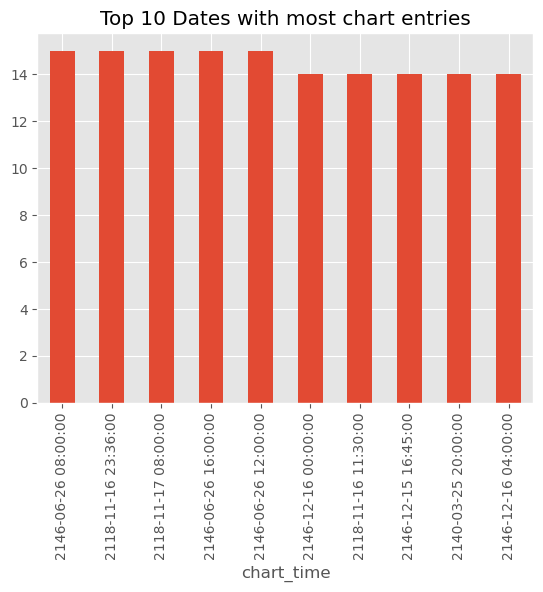

In [174]:
date_time_events['chart_time'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Dates with most chart entries')

Looking at the most frequenty chart entry dates there is  two years that stick out 2118 and 2146. These two years make up 9 out of the 10 most common chart entry dates. Based on the most frequent dates, It seems like there was a big event that occured 2146-6-26, 2118-11-16 to 2118-11-17 and 2146-12-15 to 2146-12-16

<Axes: title={'center': 'Top 10 Dates with most stored chart entries'}, xlabel='store_time'>

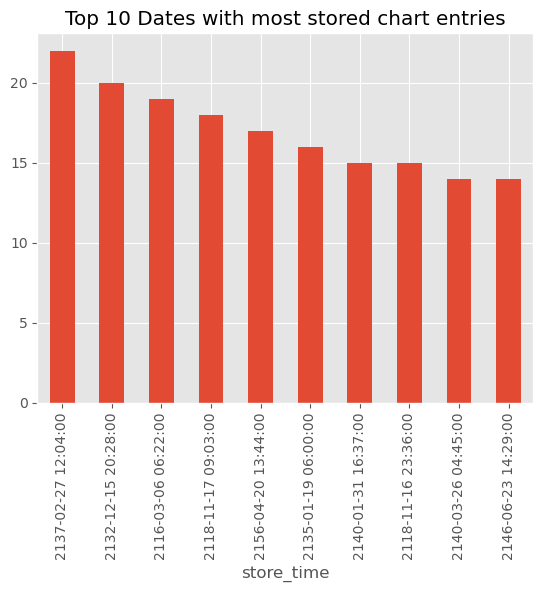

In [175]:
date_time_events['store_time'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Dates with most stored chart entries')

Reviewing and comparing the chart_time data and store_time data, the graphs reveals an interesting finding. That not every chart is stored. The top data point for most chart entries is 2146-06-26 with 15 entries while the top most stored chart entires is 2137-02-27 with roughly 23 stored entries.

This raises a concern of charting clinical procedures. There should be a one to one relationship between chart entries and stored chart entries. Meaning that for every chart created a chart is stored. This leads to a couple of issues that maybe occuring, 1: Charts aren't being stored, 2: The time to store charts is too long and inefficients, 3: Charts store times are being backdated. All three of these are pretty big issues. 

### Icu Stay: in_time, out_time, Length of stay

In [176]:
icu_stays.in_time

0     2154-04-24 23:03:00
1     2169-01-15 04:56:00
2     2170-02-24 18:18:00
3     2176-11-26 02:34:00
4     2150-06-03 20:12:00
              ...        
135   2189-06-09 12:46:00
136   2150-03-11 15:34:00
137   2143-03-22 06:42:00
138   2178-12-21 06:05:00
139   2177-03-24 21:48:00
Name: in_time, Length: 140, dtype: datetime64[ns]

<Axes: title={'center': 'Monthly ICU intake over 14 years'}, xlabel='in_time'>

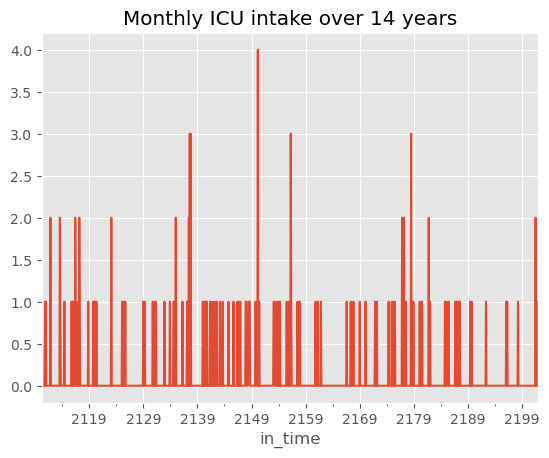

In [177]:
monthly_icu_it = icu_stays.set_index('in_time').resample('M').size()
monthly_icu_it.plot(title='Monthly ICU intake over 14 years')

<Axes: title={'center': 'quarterly ICU intake over 14 years'}, xlabel='in_time'>

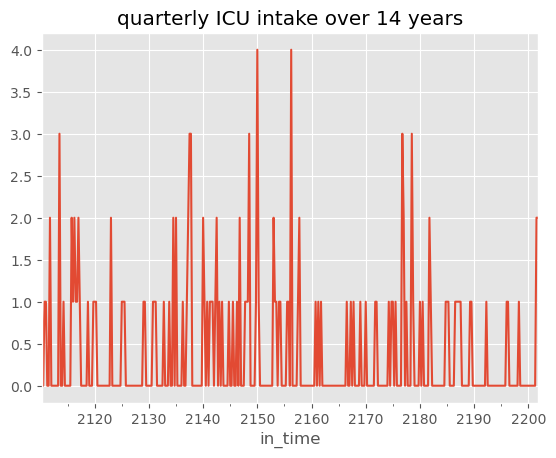

In [178]:
quarterly_icu_it = icu_stays.set_index('in_time').resample('Q').size()
quarterly_icu_it.plot(title='quarterly ICU intake over 14 years')

In [179]:
# Making categorical so I can sort the dates by month to see if a trend can be pulled.
icu_stays["month_cat_it"]=icu_stays['in_time'].dt.strftime('%b') # Jan, Feb, Etc

In [180]:
month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [181]:
icu_stays["month_cat_it"]=pd.Categorical(icu_stays['month_cat_it'], categories=month_order, ordered=True)

<Axes: title={'center': 'Monthly ICU intake'}, xlabel='month_cat_it'>

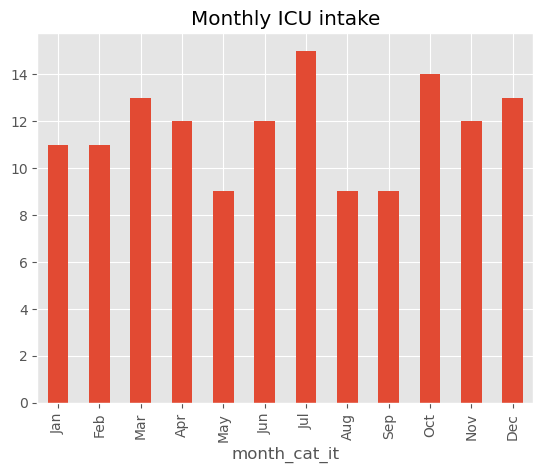

In [182]:
month_cat_it = icu_stays['month_cat_it'].value_counts(sort=False)

month_cat_it.plot(kind='bar',title='Monthly ICU intake',)

In [183]:
icu_stays['month_cat_it'].describe()

count     140
unique     12
top       Jul
freq       15
Name: month_cat_it, dtype: object

<Axes: title={'center': 'Monthly ICU discharge over 14 years'}, xlabel='out_time'>

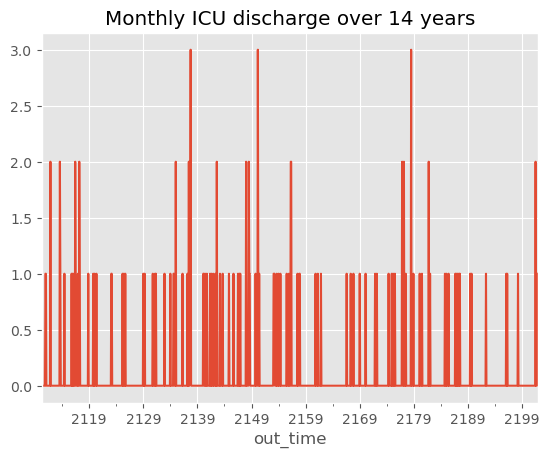

In [184]:
monthly_icu_ot = icu_stays.set_index('out_time').resample('M').size()
monthly_icu_ot.plot(title='Monthly ICU discharge over 14 years')

<Axes: title={'center': 'quarterly ICU discharge over 14 years'}, xlabel='out_time'>

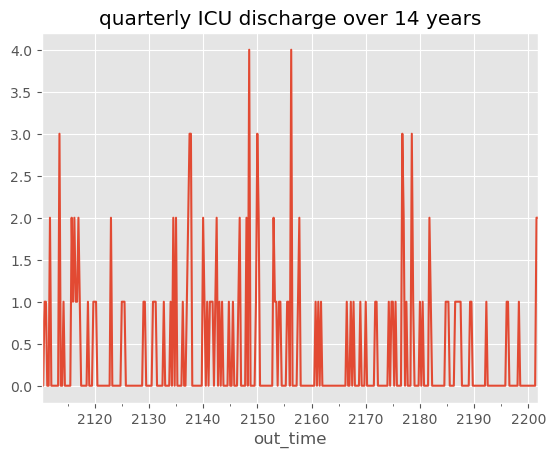

In [185]:
quarterly_icu_ot = icu_stays.set_index('out_time').resample('Q').size()
quarterly_icu_ot.plot(title='quarterly ICU discharge over 14 years')

In [186]:
# making a categorical column for the date to see if I can pull out any trends the occur monthly

icu_stays["month_cat_ot"]=icu_stays['out_time'].dt.strftime('%b') # Jan, Feb, Etc

In [187]:
icu_stays["month_cat_ot"]=pd.Categorical(icu_stays['month_cat_ot'], categories=month_order, ordered=True)

In [188]:
icu_stays['month_cat_ot'].describe()

count     140
unique     12
top       Mar
freq       17
Name: month_cat_ot, dtype: object

<Axes: title={'center': 'Monthly ICU discharge'}, xlabel='month_cat_ot'>

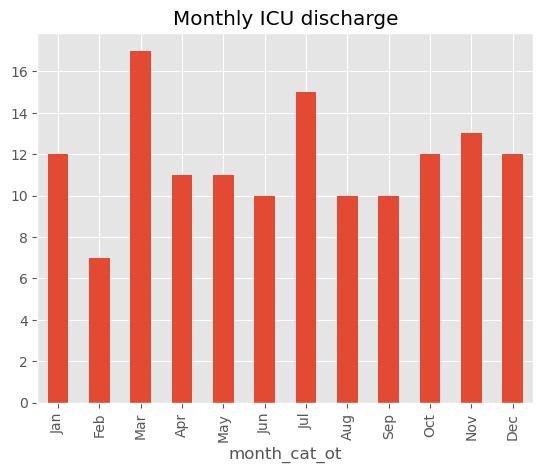

In [189]:
month_cat_ot = icu_stays['month_cat_ot'].value_counts(sort=False)

month_cat_ot.plot(kind='bar',title='Monthly ICU discharge',)

Both the monthly and quarterly in_time and out_times follow roughly the same pattern. The patients is brought into the ICU and is discharged relatively soon. One thing that is interesting is the february has a low monthly discharge but intakes but still takes in a good amount of patients .I'm going to see if there are any data points that stickout with lenght of stay

Text(0.5, 0, 'Days')

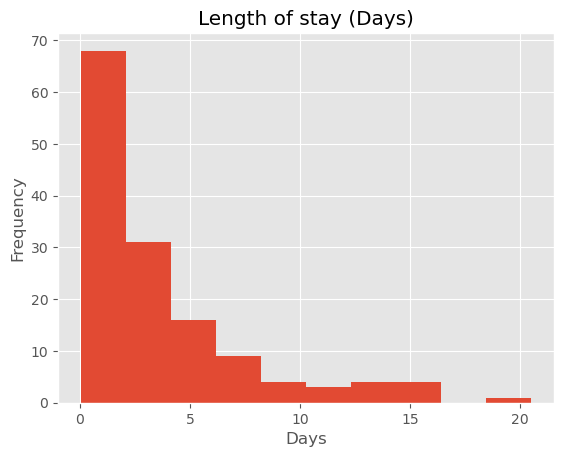

In [190]:
ax = icu_stays['length_of_stay'].plot(kind='hist', title='Length of stay (Days)')
ax.set_xlabel('Days')

Text(0.5, 0, 'Days')

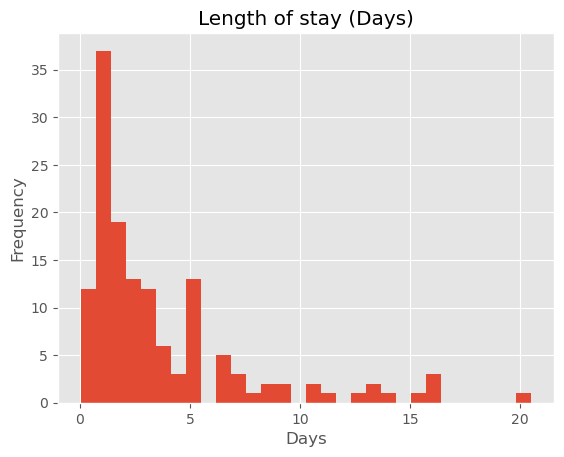

In [191]:
ax= icu_stays['length_of_stay'].plot(kind='hist',bins=30, title='Length of stay (Days)')
ax.set_xlabel('Days')

In [192]:
icu_stays['length_of_stay'].describe()

count    140.000000
mean       3.679379
std        3.896354
min        0.023727
25%        1.170663
50%        2.155093
75%        4.907749
max       20.528681
Name: length_of_stay, dtype: float64

There are two takeways that I noticed from looking at the length of stay distribution. 1: The length of stay is skewed right. Meaning majority of the data is on the left side of the distribution (length of stay is short) with a few patients having longer lenghts of stay. The second takeaway is that most ICU visit last one or two days. There is a spike around 5 days but after that the ICU stays tend to taper off.

This brings me to questions two things: What determines a patients ICU status. Having a low length of stay is good but it makes me question if the hospital is misallocating resources. The second thing is are there other confound variables associated with the longer ICU stay? Whether it be the illness the patient is diagonesed with or it be something like their age. Where elderly patients may have a harder time recovering which prolongs the ICU stays

### Ingredients

No univariate analysis will be conducted on the variables listed in the ingredient_events.

Instead the two newly created variables will be used, specificially the minute versions of the following

creation_duration: end_time - start_time. How long it takes to create the medicine.

storage_delay = store_time - end_time. How long it takes to store the medicine after completion.


Text(0.5, 0, 'Minutes')

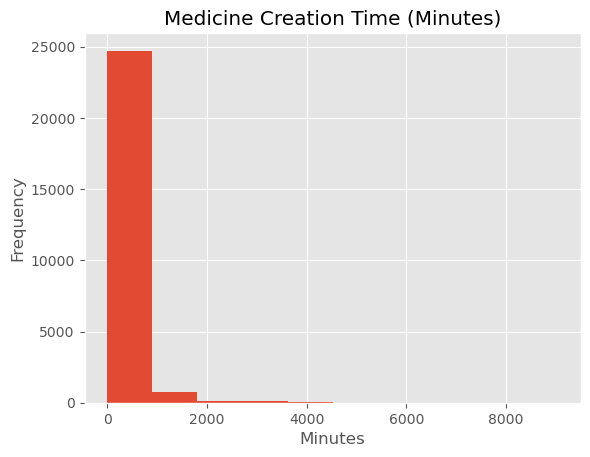

In [193]:
ax = ingredient_events['creation_minutes'].plot(kind='hist', title='Medicine Creation Time (Minutes)')
ax.set_xlabel('Minutes')

Text(0.5, 0, 'Minutes')

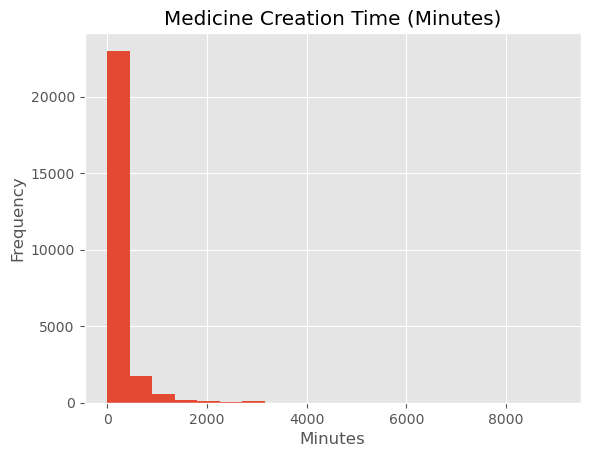

In [194]:
ax = ingredient_events['creation_minutes'].plot(kind='hist', bins=20, title='Medicine Creation Time (Minutes)')
ax.set_xlabel('Minutes')

In [195]:
ingredient_events['creation_minutes'].describe()

count    25728.000000
mean       169.405278
std        386.750532
min          1.000000
25%          1.000000
50%         42.000000
75%        158.000000
max       9040.000000
Name: creation_minutes, dtype: float64

Minutes shows that there medicine is be created facts but the scope is so wide its hard to gain valuable insight. I am changing scope to hours to see if more insight can be gained

Text(0.5, 0, 'hours')

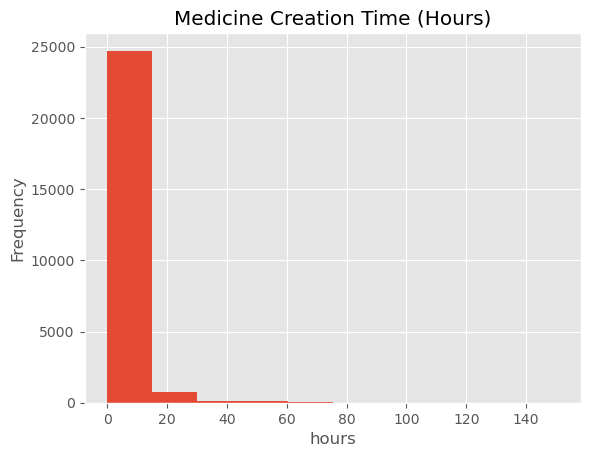

In [196]:
ingredient_events['creation_hours'] = ingredient_events['creation_minutes'] / 60

ax = ingredient_events['creation_hours'].plot(kind='hist',title='Medicine Creation Time (Hours)')
ax.set_xlabel('hours')

(0.0, 80.0)

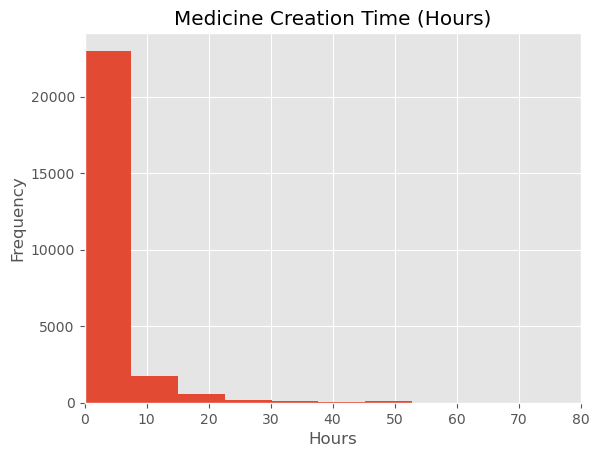

In [197]:
ax = ingredient_events['creation_hours'].plot(kind='hist', bins=20, title='Medicine Creation Time (Hours)')
ax.set_xlabel('Hours')
ax.set_xlim(0, 80)


<Axes: title={'center': 'Top 10 times to create medicine (minutes)'}, xlabel='creation_minutes'>

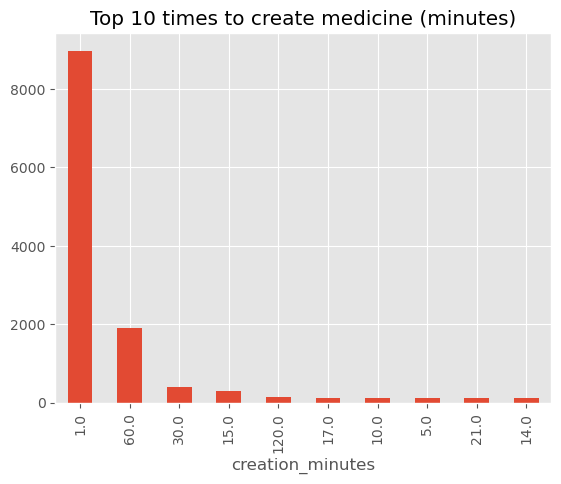

In [198]:
ingredient_events['creation_minutes'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 times to create medicine (minutes)')

After reviewing the medicine creation time. The pharmacy is creating the medicine in a timely fashion. Typically only takes them one minute to create medicines

Text(0.5, 0, 'Minutes')

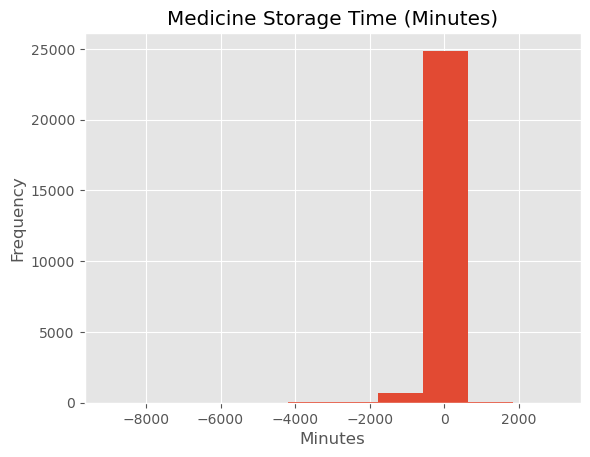

In [199]:
ax = ingredient_events['storage_minutes'].plot(kind='hist', title='Medicine Storage Time (Minutes)')
ax.set_xlabel('Minutes')

Text(0.5, 0, 'Minutes')

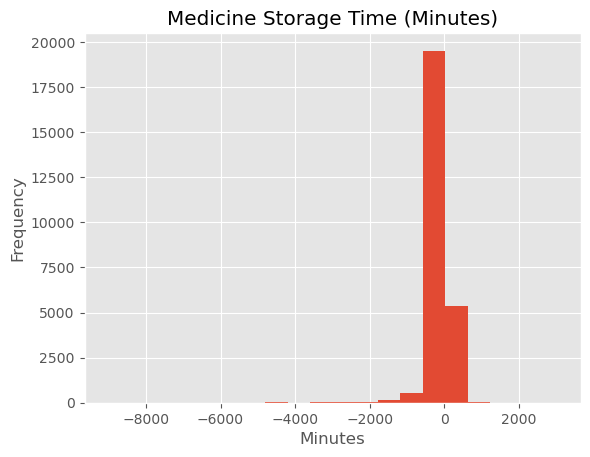

In [200]:
ax = ingredient_events['storage_minutes'].plot(kind='hist', bins=20, title='Medicine Storage Time (Minutes)')
ax.set_xlabel('Minutes')

Text(0.5, 0, 'hours')

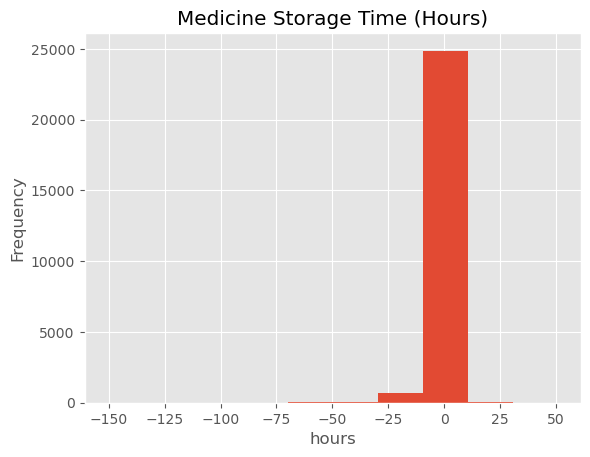

In [201]:
ingredient_events['storage_hours'] = ingredient_events['storage_minutes'] / 60

ax = ingredient_events['storage_hours'].plot(kind='hist',title='Medicine Storage Time (Hours)')
ax.set_xlabel('hours')

In [202]:
ingredient_events['storage_minutes'].describe()

count    25728.000000
mean       -52.556437
std        295.785487
min      -9040.000000
25%        -60.000000
50%         -1.000000
75%         18.000000
max       3054.000000
Name: storage_minutes, dtype: float64

<Axes: title={'center': 'Top 10 times to store medicine (minutes)'}, xlabel='storage_minutes'>

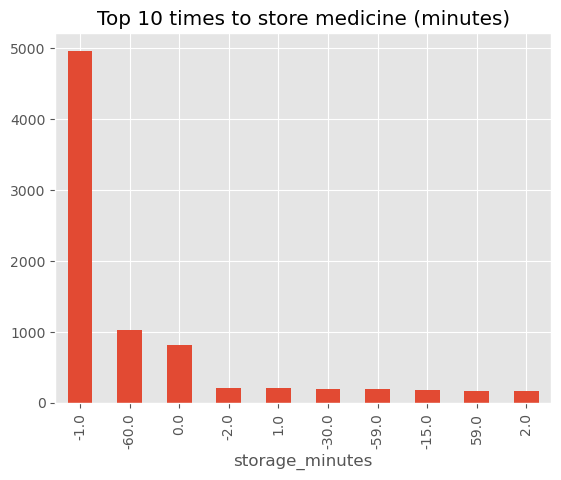

In [203]:
ingredient_events['storage_minutes'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 times to store medicine (minutes)')

Based on both variables results, I don't believe that the creation time, or storage delay will have too much impact on a patient results, due to the fact that both of these variables are consistently completed very fast. With the speed, I doubt there is too much that can be done to improve the procedures regarding these two steps. But a bivariate analysis will help determine if these features have an affect on patient recover.

Another thing is that there are negative storage minutes. That could mean that the item was created before hand/the hospital has the items on hand. Or The data is wrong.

# Hospital

Only two dataset being used for univariate testing is patients and admissions

### Patients : Gender, Anchor Group

<Axes: title={'center': ' Patient intake by Gender'}, xlabel='gender'>

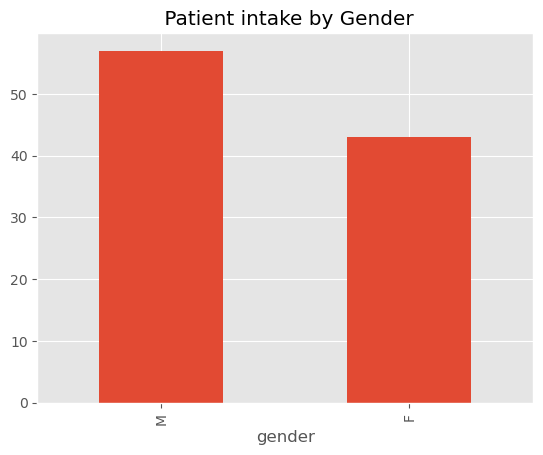

In [204]:
gender_counts = patients['gender'].value_counts()
gender_counts.plot(kind='bar', title=' Patient intake by Gender')


In [205]:
gender_counts

gender
M    57
F    43
Name: count, dtype: int64

In [206]:
patients.dtypes

subject_id              int64
gender                 object
anchor_age              int64
anchor_year             int64
anchor_year_group      object
date_of_death          object
death_status         category
dtype: object

Typically more Males are admitted then females. There are 57 males and 43 females

<Axes: title={'center': 'Patient age distribution'}, ylabel='Frequency'>

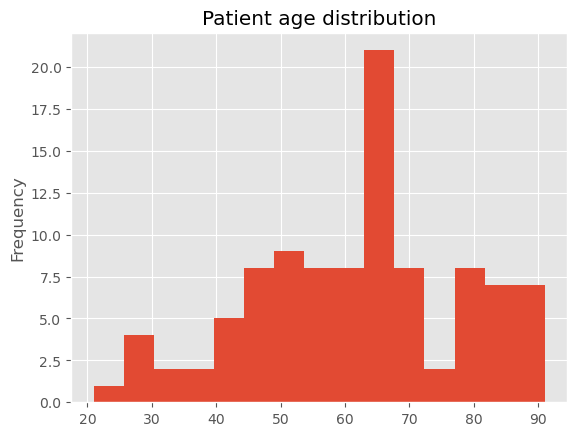

In [207]:
patients['anchor_age'].plot(kind='hist',bins=15,title='Patient age distribution')

In [208]:
patients['anchor_age'].describe()

count    100.00000
mean      61.75000
std       16.16979
min       21.00000
25%       51.75000
50%       63.00000
75%       72.00000
max       91.00000
Name: anchor_age, dtype: float64

Looking at the summary statistics and histogram, the first thing I noticed regarding ICU stay is that the histograms distribution is skewed left. This means that younger patients are typically not in the ICU. The second thing I noticed was that the 25% percentile for ICU patient is 51 years old. That is over half your life lived so I find it interesting that 51 years old isn't even the 50% percentile of age for ICU patients. There are also 0 minors in the ICU but that is due to HIPAA regulations.

## Admissions

<Axes: title={'center': ' Patient intake by Admission'}, xlabel='admission_type'>

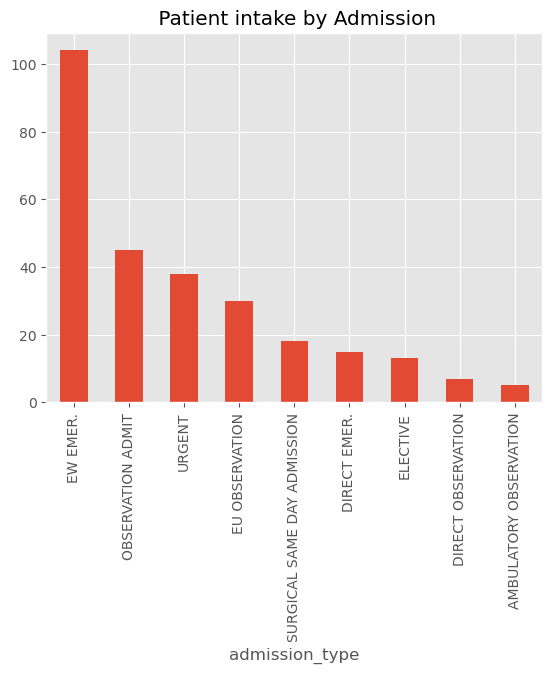

In [209]:
admission_counts = admissions['admission_type'].value_counts()
admission_counts.plot(kind='bar', title=' Patient intake by Admission')

In [210]:
admission_counts.describe()

count      9.000000
mean      30.555556
std       30.769754
min        5.000000
25%       13.000000
50%       18.000000
75%       38.000000
max      104.000000
Name: count, dtype: float64

Viewing patient intake majority of the admissions come from the Emergency ward. Two departments that stick out is the Emergency which has a high number of 104. This makes sense because its the ICU where patients in critical care are admitted to. But the one that doesn't makes sense is elective. These are planned in advanced non emergencies. So for example an open heart surgery would be considered an elective. This makes me question if there is misallocation of resources here. What type of surgeries are being sent to the ICU.

<Axes: title={'center': ' Patient race by Admission'}, xlabel='race'>

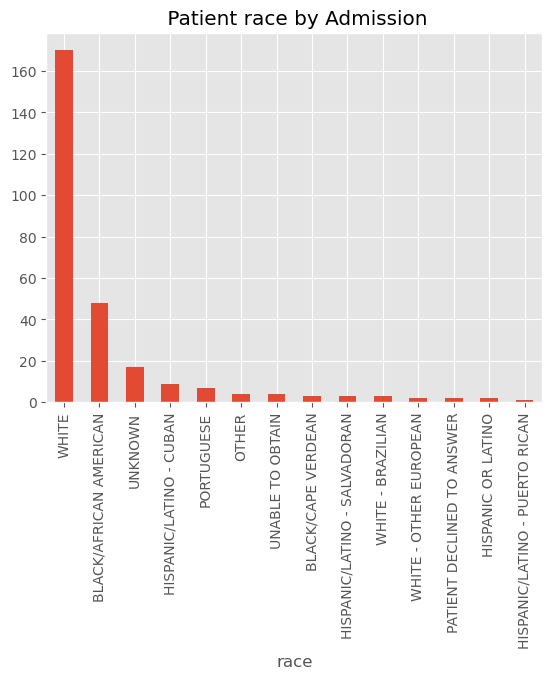

In [211]:
race_counts = admissions['race'].value_counts()
race_counts.plot(kind='bar', title=' Patient race by Admission')

<Axes: title={'center': ' Patient intake by Marital_status'}, xlabel='marital_status'>

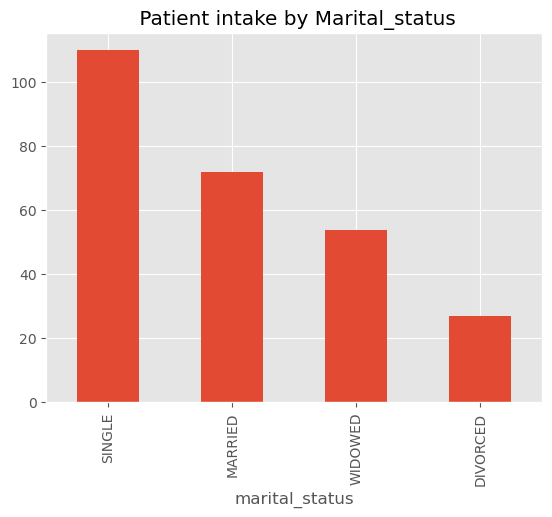

In [212]:
marital_status_counts = admissions['marital_status'].value_counts()
marital_status_counts.plot(kind='bar', title=' Patient intake by Marital_status')

In [213]:
admissions['marital_status'].describe()

count        263
unique         4
top       SINGLE
freq         110
Name: marital_status, dtype: object

In [214]:
marital_status_counts.describe()

count      4.000000
mean      65.750000
std       34.817381
min       27.000000
25%       47.250000
50%       63.000000
75%       81.500000
max      110.000000
Name: count, dtype: float64

<Axes: title={'center': ' Patient intake by language'}, xlabel='language'>

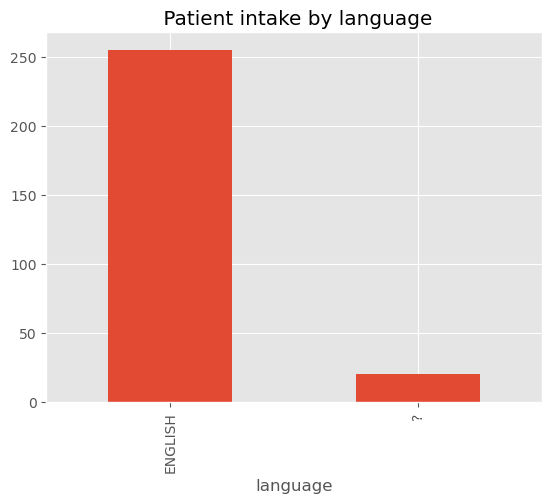

In [215]:
language_counts = admissions['language'].value_counts()
language_counts.plot(kind='bar', title=' Patient intake by language')

In [216]:
admissions['language'].nunique()

2

<Axes: title={'center': ' Patient intake by insurance coverage'}, xlabel='insurance'>

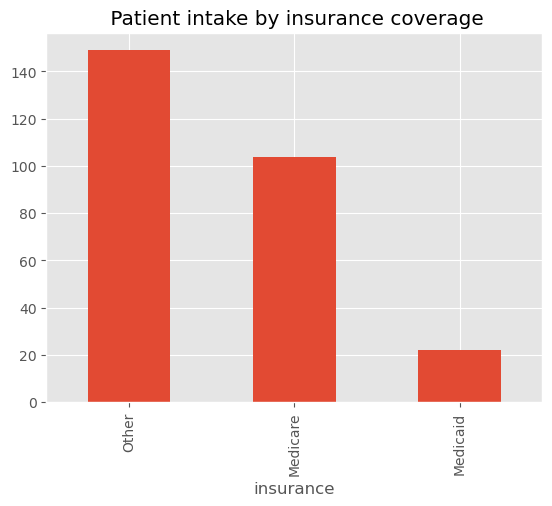

In [217]:
insurance_counts = admissions['insurance'].value_counts()
insurance_counts.plot(kind='bar', title=' Patient intake by insurance coverage')

In [218]:
admissions['insurance'].describe()

count       275
unique        3
top       Other
freq        149
Name: insurance, dtype: object

In [219]:
insurance_counts.describe()

count      3.000000
mean      91.666667
std       64.392028
min       22.000000
25%       63.000000
50%      104.000000
75%      126.500000
max      149.000000
Name: count, dtype: float64

Does other include no insurance?

# Feature Relationships

Since the features are across different datasets I will have to inner join them on subject_id to create be able to do the bivariate data analysis

In [220]:
#### List of merged datasets LENGTH of stay

# Merging ICU stay with Date time Events
m_icu_dte=icu_stays.merge(date_time_events, on=['subject_id', 'hadm_id','stay_id'], how='inner')

# Merging ICU stays with ingredients
m_icu_ing=icu_stays.merge(ingredient_events, on=['subject_id', 'hadm_id','stay_id'], how='inner')

# Merging ICU stays with Input events
m_icu_inp=icu_stays.merge(input_events, on=['subject_id', 'hadm_id','stay_id'], how='inner')

# Merging ICU stays with output events
m_icu_oup=icu_stays.merge(output_events, on=['subject_id', 'hadm_id','stay_id'], how='inner')

# Merging ICU stays with procedure events
m_icu_pro=icu_stays.merge(procedure_events, on=['subject_id', 'hadm_id','stay_id'], how='inner')

# Merging ICU stays with Patients
m_icu_pat=icu_stays.merge(patients, on=['subject_id'], how='inner')

# Merging ICU stays with Admissions
m_icu_adm=icu_stays.merge(admissions, on=['subject_id'], how='inner')

# Merging ICU stays with diagnoses
m_icu_dia=icu_stays.merge(mh_diagoneses, on=['subject_id','hadm_id'], how='inner')
                          
# Merging ICU stays with Hospital Procedures
m_icu_hps=icu_stays.merge(mh_procedure, on=['subject_id','hadm_id'], how='inner')

## Length of stay (LOS)

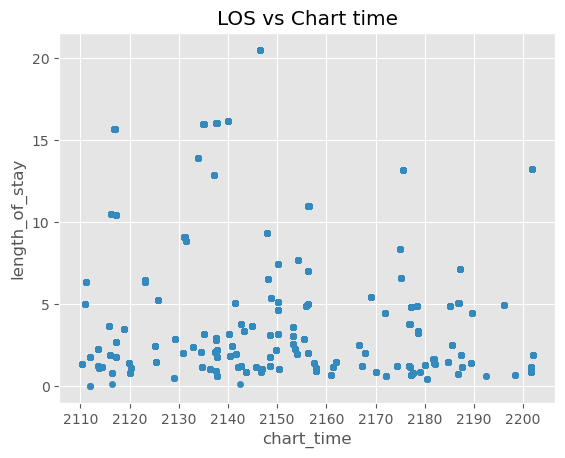

In [221]:
m_icu_dte.plot(kind='scatter',
               x='chart_time',
               y='length_of_stay',
               title='LOS vs Chart time')
plt.show()

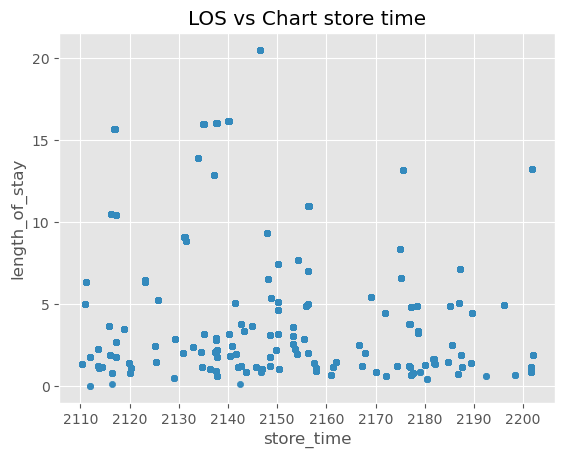

In [222]:
m_icu_dte.plot(kind='scatter',
               x='store_time',
               y='length_of_stay',
               title='LOS vs Chart store time')
plt.show()

Based on the two charts above there doesn't seem to be a trend with between length of stay and chart and store times

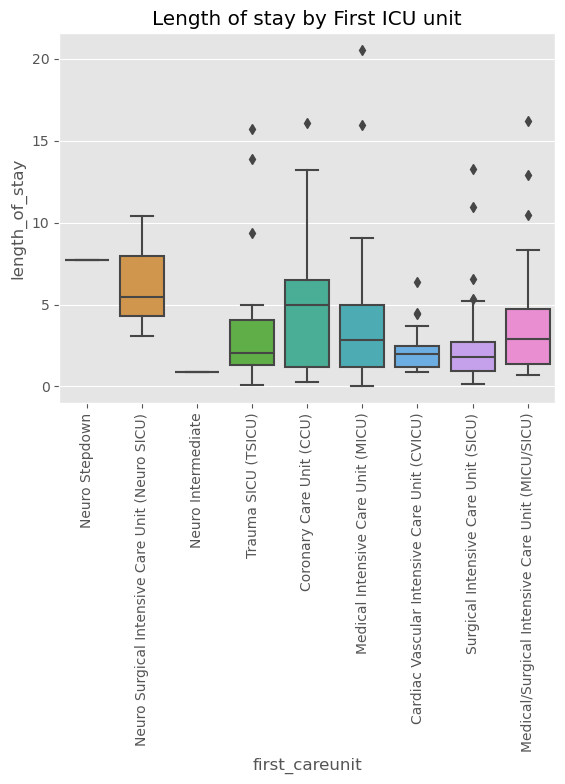

In [223]:
sns.boxplot(data=icu_stays, x='first_careunit', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by First ICU unit')
plt.show()

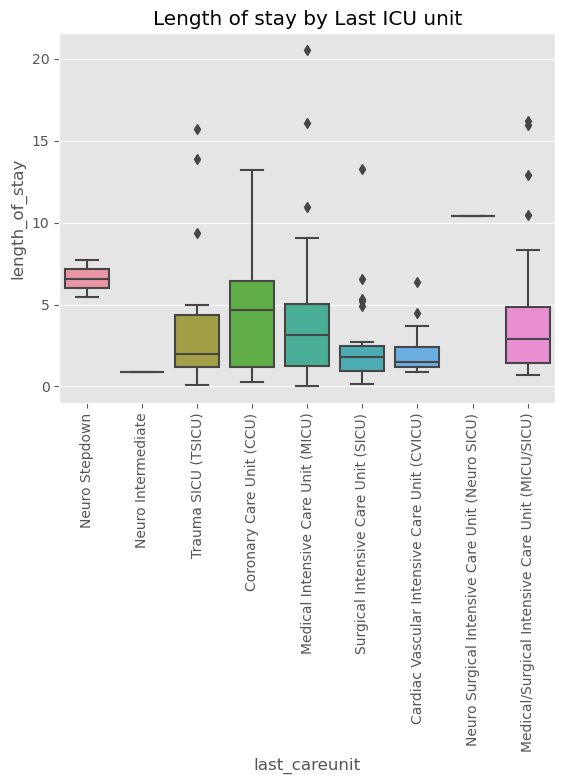

In [224]:
sns.boxplot(data=icu_stays, x='last_careunit', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by Last ICU unit')
plt.show()

Based on the box plot of both the first care unit and last care unit to see a patients, the Coronary Care Unit (CCU) exhbits wide variability in patient length of stay. The CCU may be a valuable unit to investigate further in terms of clinical procedures, care protocol and patients stratification.

In [225]:
m_icu_ing

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,in_time,out_time,length_of_stay,month_cat_it,month_cat_ot,...,linkorderid,statusdescription,originalamount,originalrate,creation_duration,storage_delay,creation_minutes,storage_minutes,creation_hours,storage_hours
0,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:00,2154-05-02 15:55:00,7.702512,Apr,May,...,5891810,FinishedRunning,0,0.01800,0 days 01:00:00,-1 days +23:42:00,60.0,-18.0,1.000000,-0.300000
1,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:00,2154-05-02 15:55:00,7.702512,Apr,May,...,5891810,FinishedRunning,0,100.00000,0 days 01:00:00,-1 days +23:42:00,60.0,-18.0,1.000000,-0.300000
2,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:00,2154-05-02 15:55:00,7.702512,Apr,May,...,5891810,FinishedRunning,0,100.00000,0 days 01:00:00,-1 days +23:42:00,60.0,-18.0,1.000000,-0.300000
3,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:00,2154-05-02 15:55:00,7.702512,Apr,May,...,4877313,FinishedRunning,0,250.00000,0 days 00:01:00,-1 days +23:59:00,1.0,-1.0,0.016667,-0.016667
4,10018328,23786647,31269608,Neuro Stepdown,Neuro Stepdown,2154-04-24 23:03:00,2154-05-02 15:55:00,7.702512,Apr,May,...,4877313,FinishedRunning,0,250.00000,0 days 00:01:00,-1 days +23:59:00,1.0,-1.0,0.016667,-0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25723,10015931,22130791,37093652,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2177-03-24 21:48:00,2177-03-29 18:03:00,4.844086,Mar,Mar,...,6086561,FinishedRunning,0,700.00000,0 days 00:01:00,-1 days +23:59:00,1.0,-1.0,0.016667,-0.016667
25724,10015931,22130791,37093652,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2177-03-24 21:48:00,2177-03-29 18:03:00,4.844086,Mar,Mar,...,8410839,FinishedRunning,0,100.00000,0 days 09:56:00,0 days 00:30:00,596.0,30.0,9.933333,0.500000
25725,10015931,22130791,37093652,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2177-03-24 21:48:00,2177-03-29 18:03:00,4.844086,Mar,Mar,...,8410839,FinishedRunning,0,100.00000,0 days 09:56:00,0 days 00:30:00,596.0,30.0,9.933333,0.500000
25726,10015931,22130791,37093652,Medical/Surgical Intensive Care Unit (MICU/SICU),Medical/Surgical Intensive Care Unit (MICU/SICU),2177-03-24 21:48:00,2177-03-29 18:03:00,4.844086,Mar,Mar,...,4508779,Paused,0,75.33831,0 days 01:41:00,-1 days +22:19:00,101.0,-101.0,1.683333,-1.683333


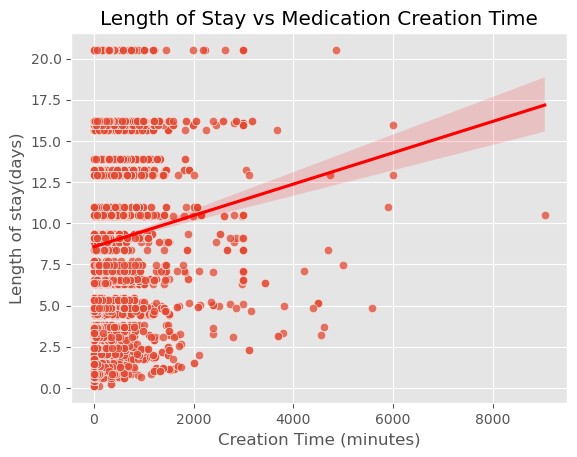

In [226]:
sns.scatterplot(data=m_icu_ing, x='creation_minutes', y='length_of_stay',alpha=0.5)
sns.regplot(data=m_icu_ing,x='creation_minutes', y='length_of_stay', scatter=False, color='red')

plt.title('Length of Stay vs Medication Creation Time')
plt.xlabel("Creation Time (minutes)")
plt.ylabel('Length of stay(days)')
plt.show()

Looking at the trend line there is no correlation between length of stay and medication creation time

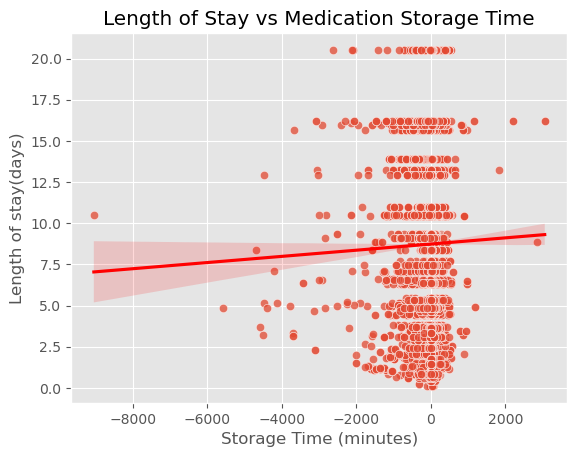

In [227]:
sns.scatterplot(data=m_icu_ing, x='storage_minutes', y='length_of_stay',alpha=0.5)
sns.regplot(data=m_icu_ing,x='storage_minutes', y='length_of_stay', scatter=False, color='red')

plt.title('Length of Stay vs Medication Storage Time')
plt.xlabel("Storage Time (minutes)")
plt.ylabel('Length of stay(days)')
plt.show()

Looking at the trend line there is no correlation between length of stay and medication store time

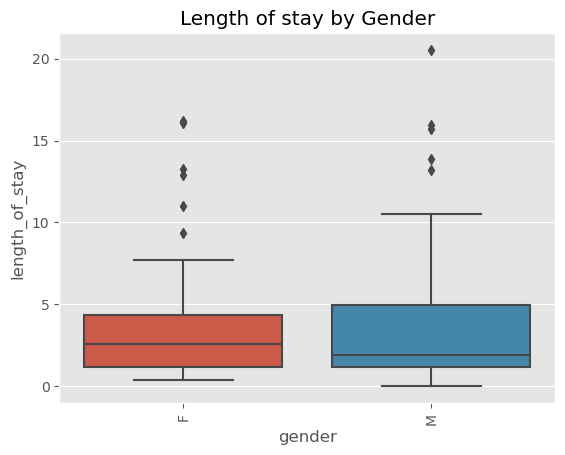

In [228]:
sns.boxplot(data=m_icu_pat, x='gender', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by Gender')
plt.show()

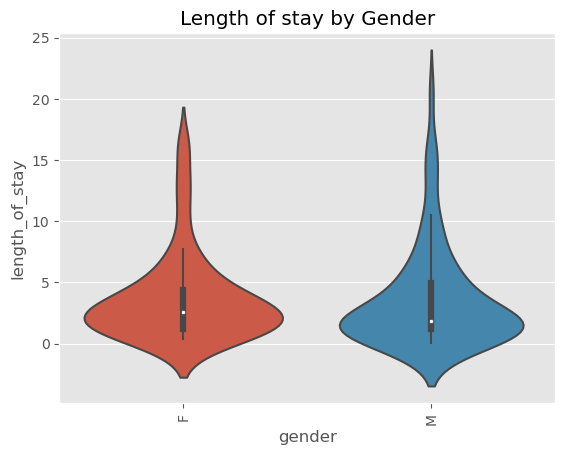

In [229]:
sns.violinplot(data=m_icu_pat, x='gender', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by Gender')
plt.show()

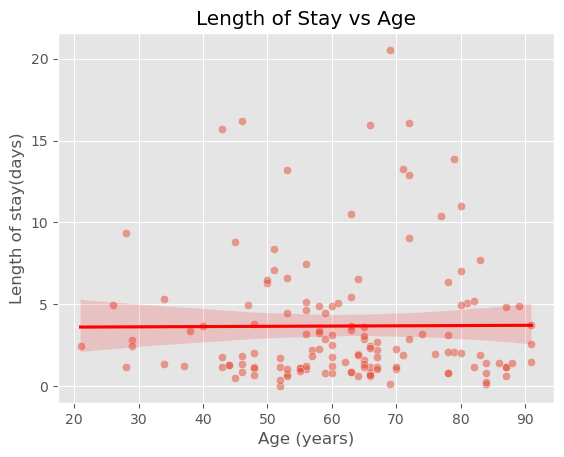

In [230]:
sns.scatterplot(data=m_icu_pat, x='anchor_age', y='length_of_stay',alpha=0.5)
sns.regplot(data=m_icu_pat,x='anchor_age', y='length_of_stay', scatter=False, color='red')

plt.title('Length of Stay vs Age')
plt.xlabel("Age (years)")
plt.ylabel('Length of stay(days)')
plt.show()

Length of stay vs age has no meaningful insight

C:\Users\tayle\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


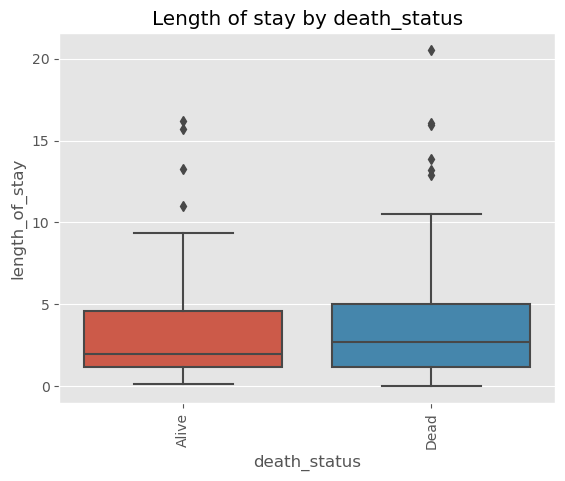

In [231]:
sns.boxplot(data=m_icu_pat, x='death_status', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by death_status')
plt.show()

While the IQR appears similar. It may be worth investigating that longer ICU stays could be associated with higer mortality risks.

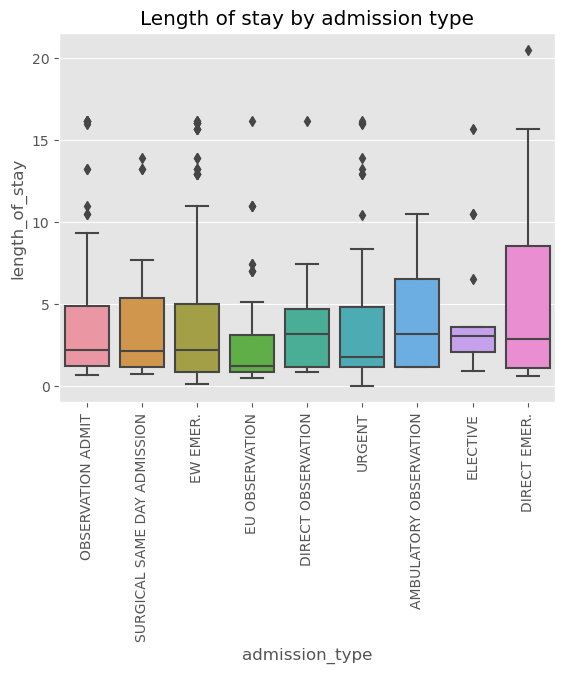

In [232]:
sns.boxplot(data=m_icu_adm, x='admission_type', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by admission type')
plt.show()

The Lenght of stay by admission type has two admission types that I would like to review further. Direct emergency admissions (could this be confounding with insurance type, waiting till the last minute because financial burden care could cause?) and Emergency ward admission (is there any procedures that are showing to not work as well?

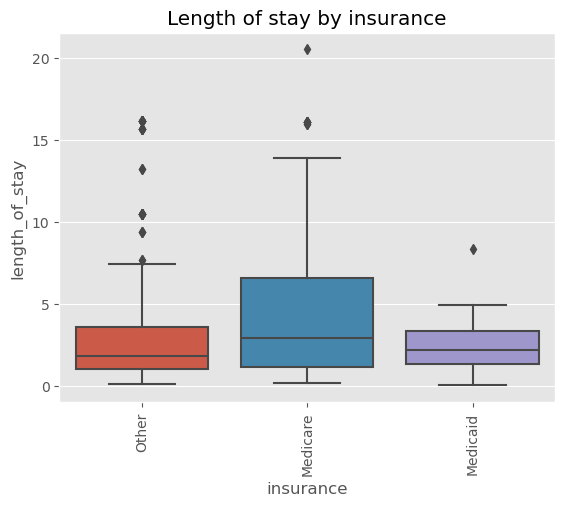

In [233]:
sns.boxplot(data=m_icu_adm, x='insurance', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by insurance')
plt.show()

Looking at the box plot length of stay by medicare make sense that the boxplot is the biggest. I think the variations for this come from other variables. However, I think the length of stay of others might be something to look into.

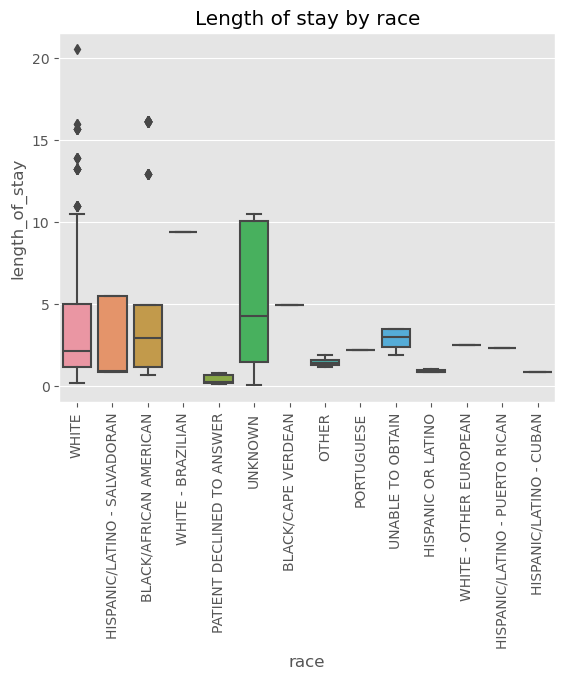

In [234]:
sns.boxplot(data=m_icu_adm, x='race', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by race')
plt.show()

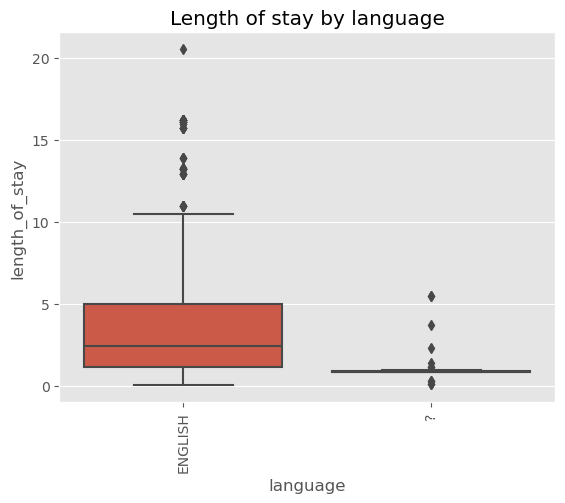

In [235]:
sns.boxplot(data=m_icu_adm, x='language', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by language')
plt.show()

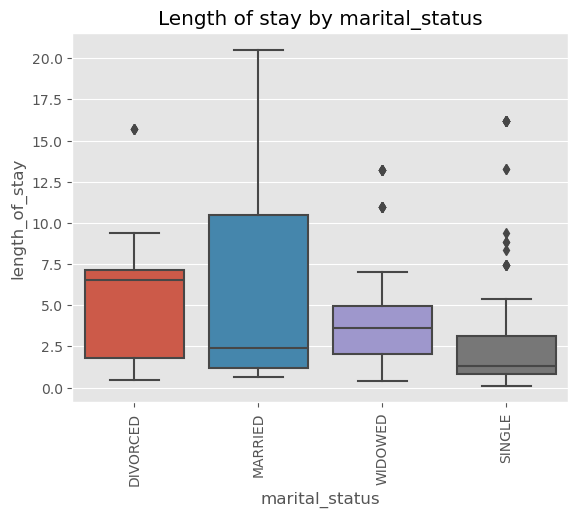

In [236]:
sns.boxplot(data=m_icu_adm, x='marital_status', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by marital_status')
plt.show()

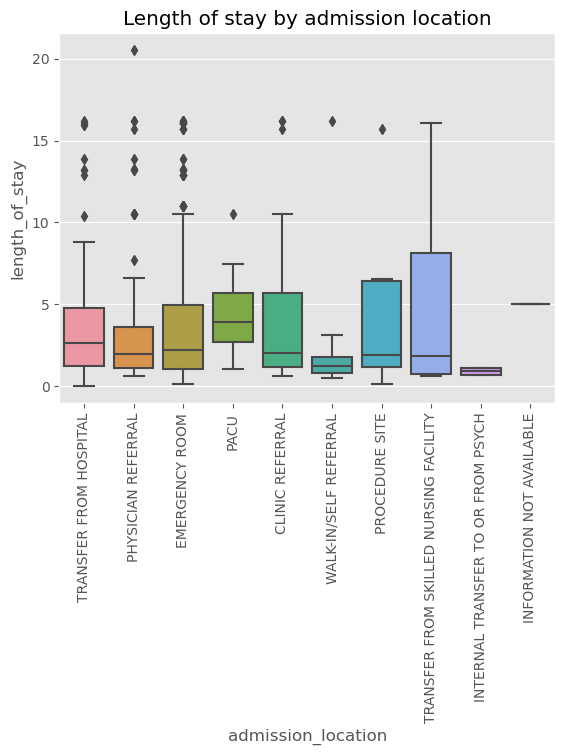

In [237]:
sns.boxplot(data=m_icu_adm, x='admission_location', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by admission location')
plt.show()

The length of stay by Physcial referral has a lot of outlier that are longer than the rest of the stay. Are these higher risk procedures. Could lead to multi variate test with Admission, length of stay and procedure.

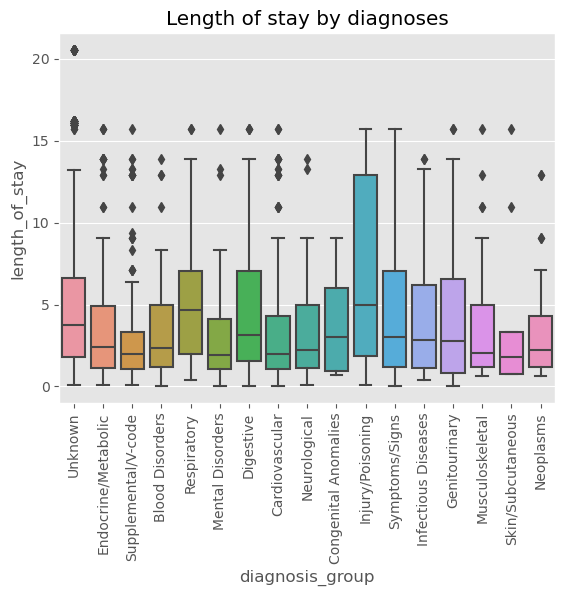

In [238]:
sns.boxplot(data=m_icu_dia, x='diagnosis_group', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by diagnoses')
plt.show()

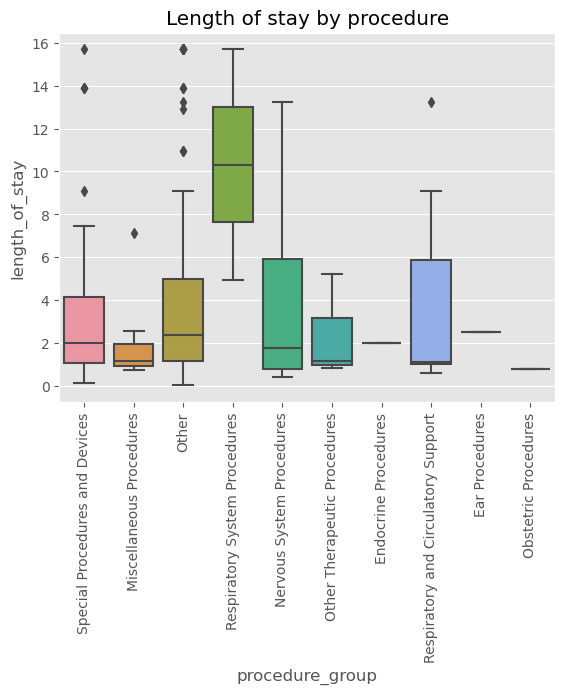

In [239]:
sns.boxplot(data=m_icu_hps, x='procedure_group', y='length_of_stay')
plt.xticks(rotation=90)
plt.title('Length of stay by procedure')
plt.show()

## Death status

In [240]:
# Merged data sets Patients (Death Date)

m_pat_adm=patients.merge(admissions,on=['subject_id'], how='inner')

m_pat_hps=patients.merge(mh_procedure, on=['subject_id'], how='inner')

m_pat_dia=patients.merge(mh_diagoneses,on=['subject_id'],how='inner')

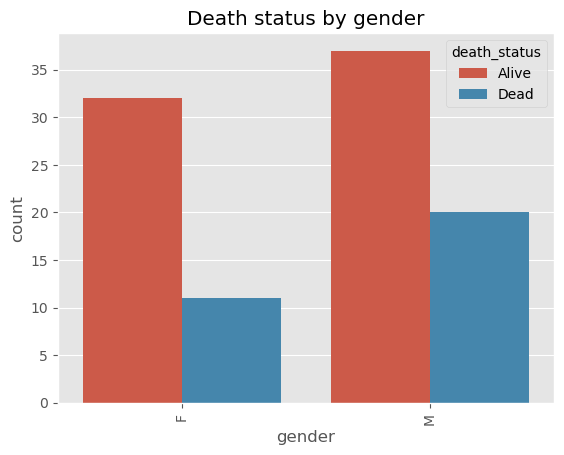

In [241]:
sns.countplot(data=patients, x='gender', hue='death_status')
plt.xticks(rotation=90)
plt.title('Death status by gender')
plt.show()

C:\Users\tayle\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


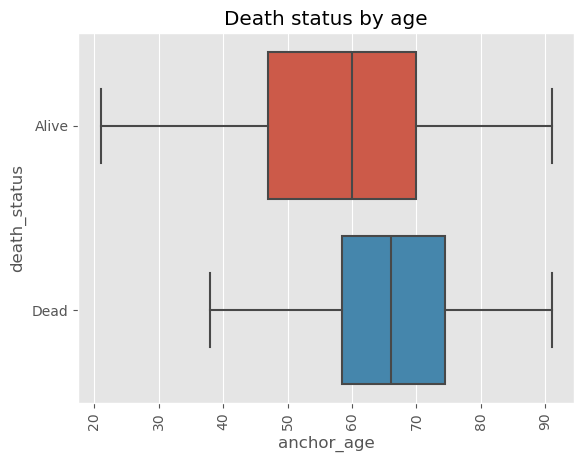

In [242]:
sns.boxplot(data=patients, x='anchor_age', y='death_status')
plt.xticks(rotation=90)
plt.title('Death status by age')
plt.show()

Based on the characteristics it might be worth looking further into if older patients are more likely to die in the ICU. And if Male patients are more likely to die in the ICU

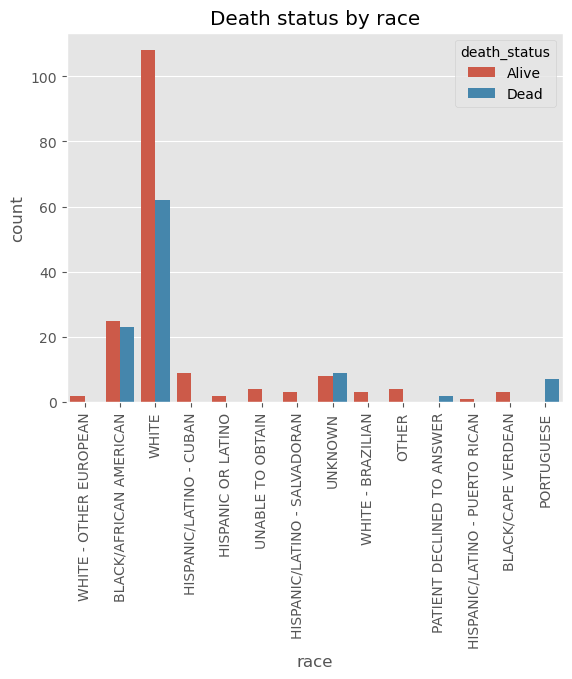

In [243]:
sns.countplot(data=m_pat_adm, x='race', hue='death_status')
plt.xticks(rotation=90)
plt.title('Death status by race')
plt.show()

Looking at the race death, white stick out just by sheer volume, but Black/African American should be investingated more. This is based on how many deaths they have compared to alive patients

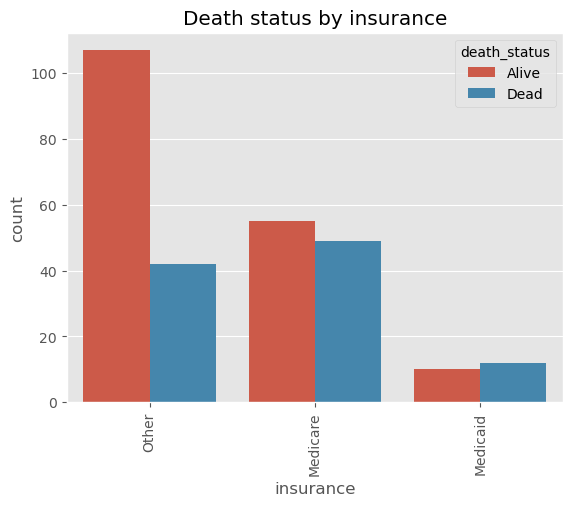

In [244]:
sns.countplot(data=m_pat_adm, x='insurance', hue='death_status')
plt.xticks(rotation=90)
plt.title('Death status by insurance')
plt.show()

The death by insurance is all pretty alarming. How many deaths there are by medicare patients is crazy. But the fact that medicaid patients are dying more then surviving in the ICU is also wild to think.

I think this may have to do with finances but that is something I would like to look into further

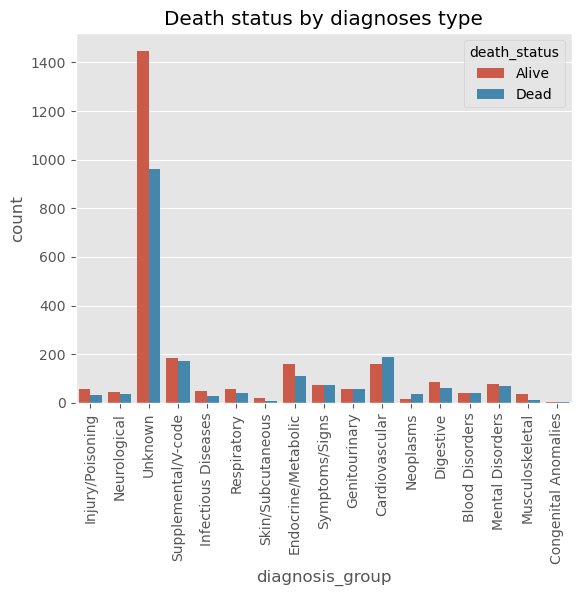

In [245]:
sns.countplot(data=m_pat_dia, x='diagnosis_group', hue='death_status')
plt.xticks(rotation=90)
plt.title('Death status by diagnoses type')
plt.show()

Looks like There may be double counting of multiple lifes. looks like cardiovascular is the main interest. But one person can I be on this list multiple times so heavily discount the results

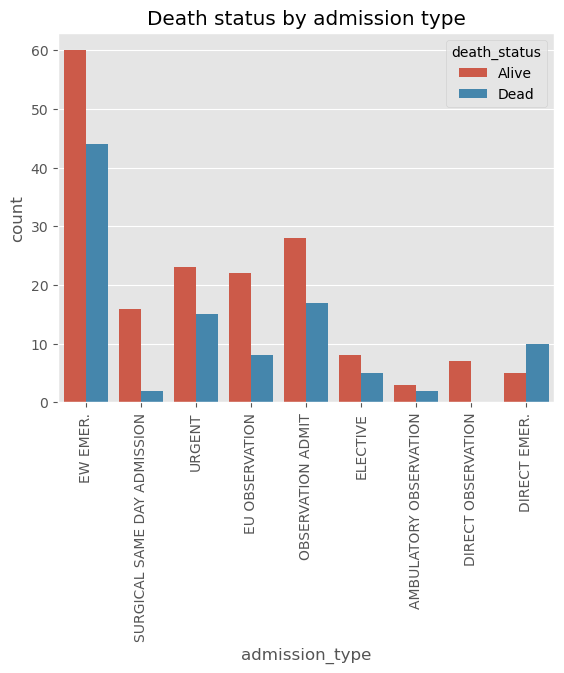

In [246]:
sns.countplot(data=m_pat_adm, x='admission_type', hue='death_status')
plt.xticks(rotation=90)
plt.title('Death status by admission type')
plt.show()

Based on the admission types. How the hospital handles direct emergencies needs to be looked at. More patients are coming out dead then they are suriving if they are a direct emergency

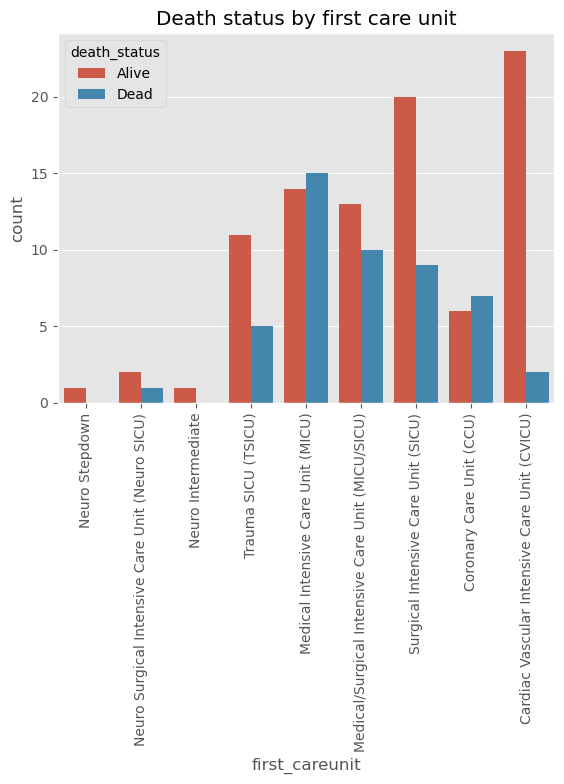

In [247]:
sns.countplot(data=m_icu_pat, x='first_careunit', hue='death_status')
plt.xticks(rotation=90)
plt.title('Death status by first care unit')
plt.show()

The first care unit being the medical icu is something that should be looked into further. Is there medical malpractice, could they be understaffed. further analysis would need to be done to see if there is a correlation

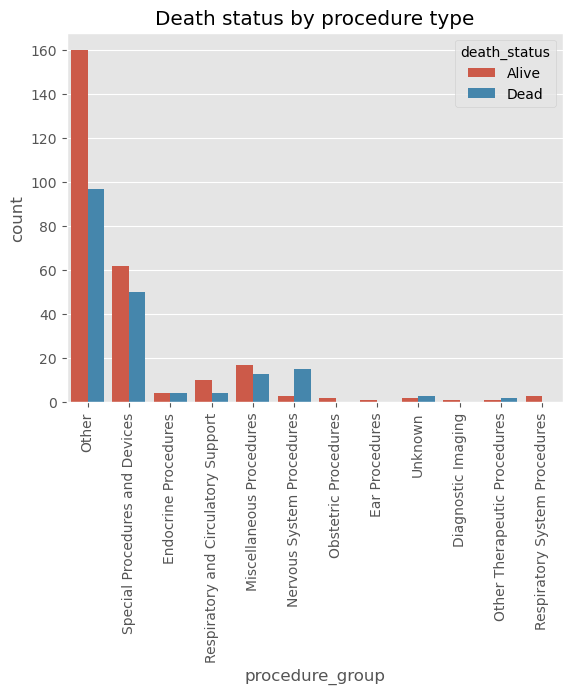

In [248]:
sns.countplot(data=m_pat_hps, x='procedure_group', hue='death_status')
plt.xticks(rotation=90)
plt.title('Death status by procedure type')
plt.show()

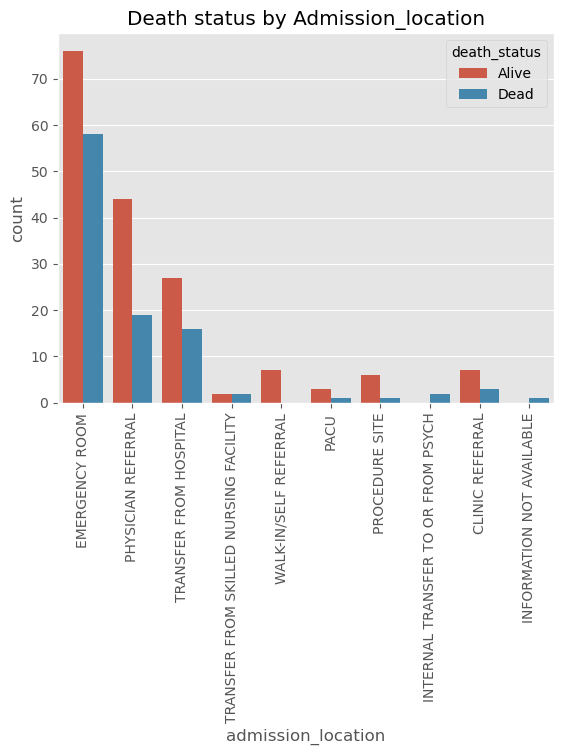

In [249]:
sns.countplot(data=m_pat_adm, x='admission_location', hue='death_status')
plt.xticks(rotation=90)
plt.title('Death status by Admission_location')
plt.show()

The Death Status by the Emergency room has a large count of patients. But it also interesting looking in at the Walk/in/self referral. Are the patients coming in too late for treatment to be effective

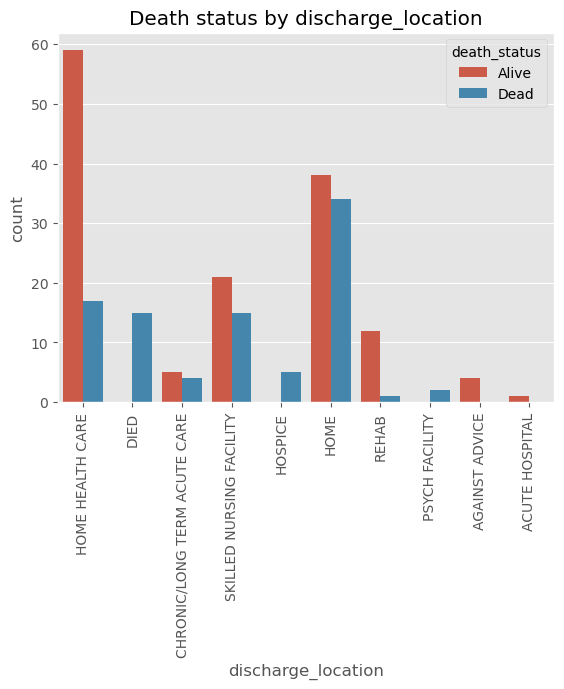

In [250]:
sns.countplot(data=m_pat_adm, x='discharge_location', hue='death_status')
plt.xticks(rotation=90)
plt.title('Death status by discharge_location')
plt.show()

Looks like there could be futher analysis done on discharge locations to home. Hospice and died make sense there is a high death rate. Psych facility looks to be a one off thing. But the rate of patients that die where the discharge location is home is super high. Are the proper procedures not being used?

# Input events

In [251]:
# Merge input events with d_item

m_inp_dit=input_events.merge(d_items,on=['itemid'], how='inner')

dm_inp_adm=m_inp_dit.merge(admissions, on=['subject_id'], how='inner')

dm_inp_pat=m_inp_dit.merge(patients, on=['subject_id'], how='inner')

dm_inp_icu=m_inp_dit.merge(icu_stays, on=['subject_id'], how='inner')

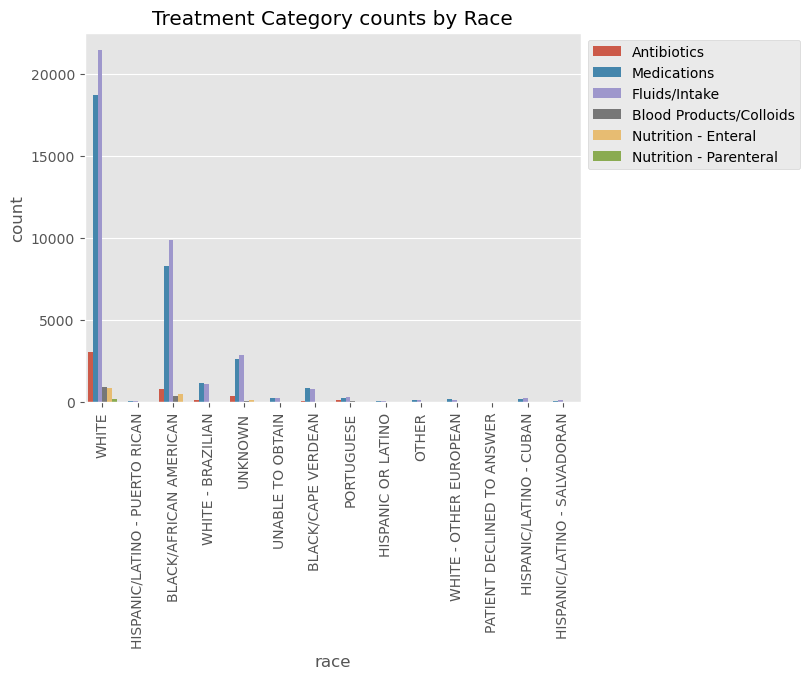

In [252]:
sns.countplot(data=dm_inp_adm, x='race', hue='category')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.title('Treatment Category counts by Race')
plt.show()

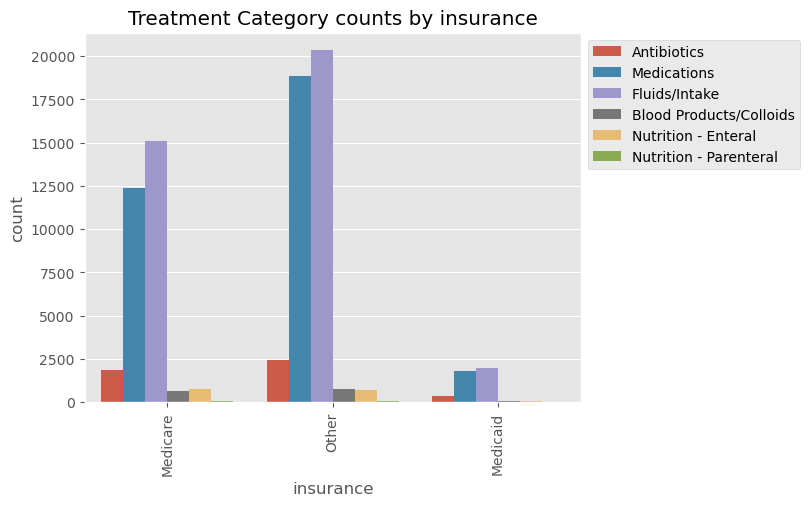

In [253]:
sns.countplot(data=dm_inp_adm, x='insurance', hue='category')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.title('Treatment Category counts by insurance')
plt.show()

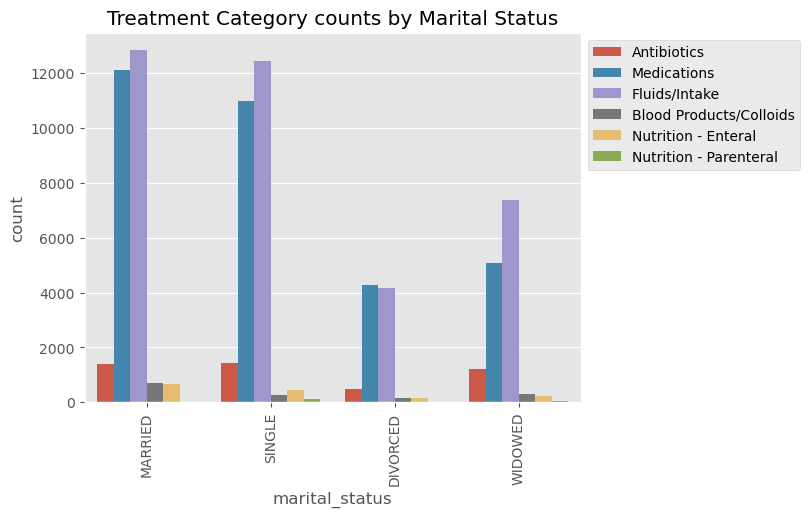

In [254]:
sns.countplot(data=dm_inp_adm, x='marital_status', hue='category')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.title('Treatment Category counts by Marital Status')
plt.show()

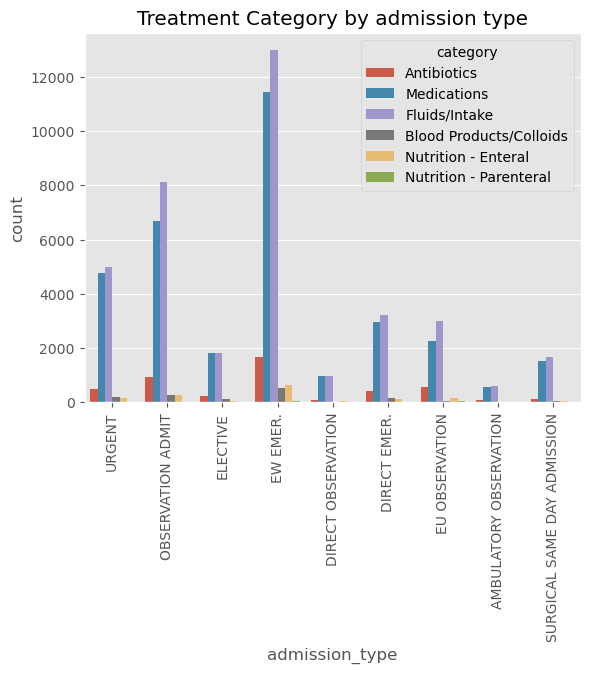

In [255]:
sns.countplot(data=dm_inp_adm, x='admission_type', hue='category')
plt.xticks(rotation=90)
plt.title('Treatment Category by admission type')
plt.show()

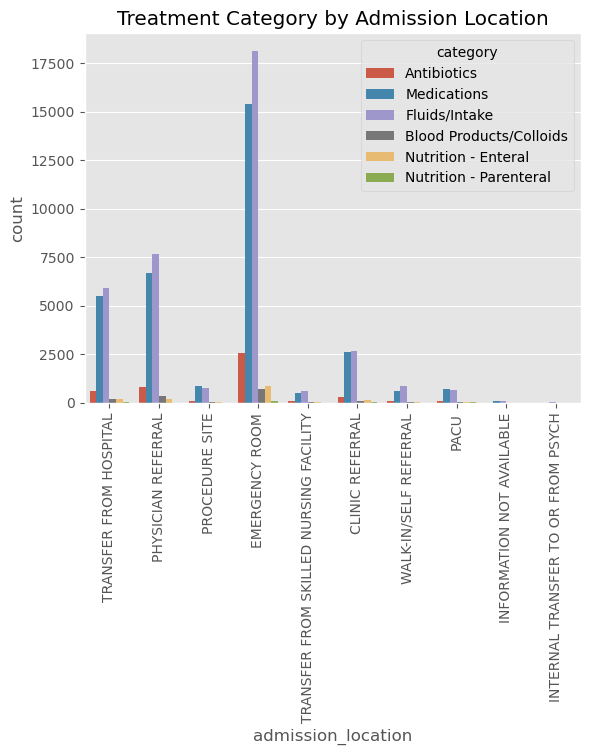

In [256]:
sns.countplot(data=dm_inp_adm, x='admission_location', hue='category')
plt.xticks(rotation=90)
plt.title('Treatment Category by Admission Location')
plt.show()

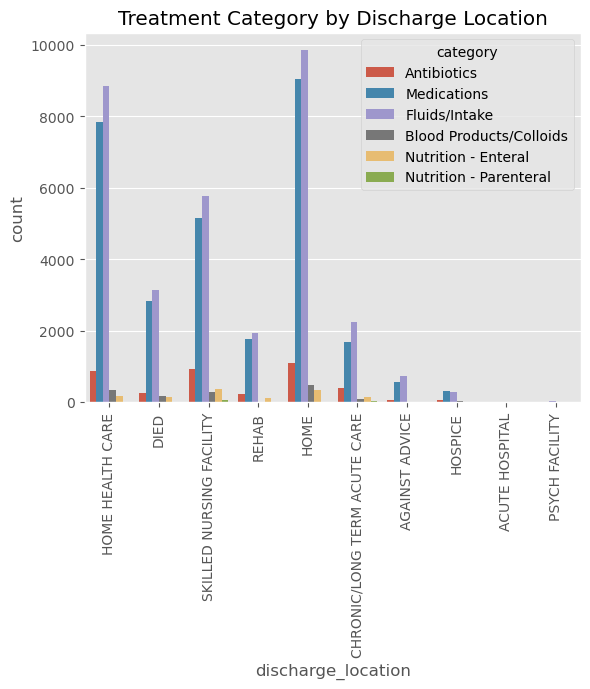

In [257]:
sns.countplot(data=dm_inp_adm, x='discharge_location', hue='category')
plt.xticks(rotation=90)
plt.title('Treatment Category by Discharge Location')
plt.show()

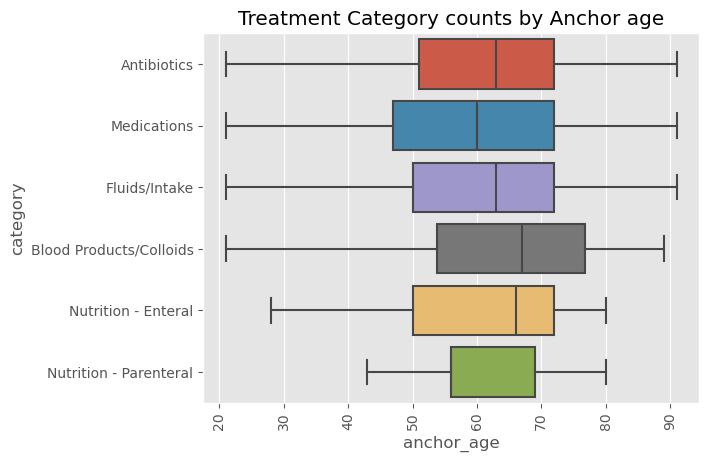

In [258]:
sns.boxplot(data=dm_inp_pat, x='anchor_age', y='category')
plt.xticks(rotation=90)
plt.title('Treatment Category counts by Anchor age')
plt.show()

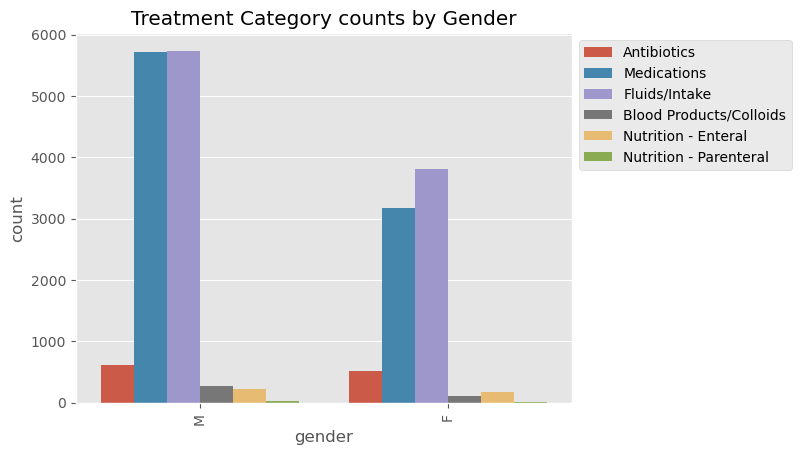

In [259]:
sns.countplot(data=dm_inp_pat, x='gender', hue='category')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.title('Treatment Category counts by Gender')
plt.show()

C:\Users\tayle\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\tayle\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


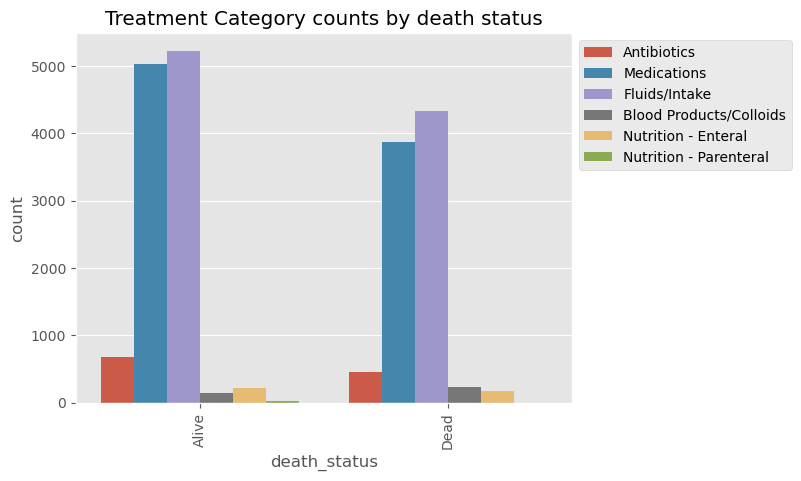

In [260]:
sns.countplot(data=dm_inp_pat, x='death_status', hue='category')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.title('Treatment Category counts by death status')
plt.show()

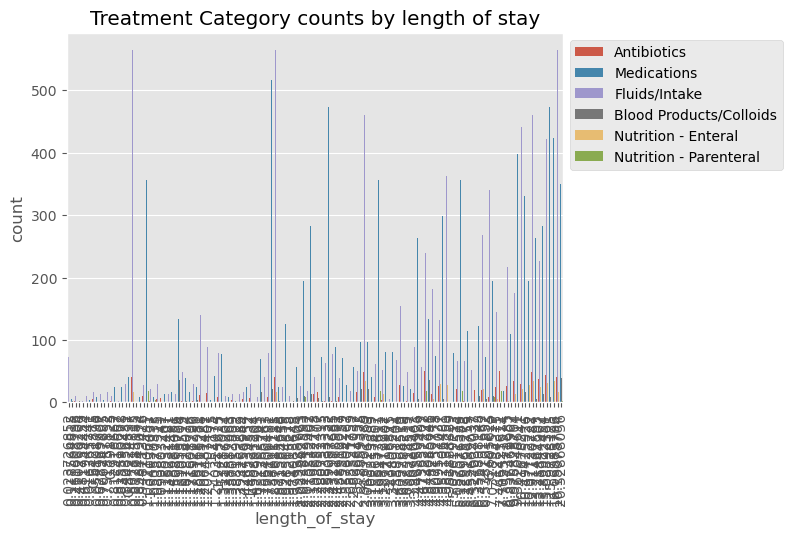

In [261]:
sns.countplot(data=dm_inp_icu, x='length_of_stay', hue='category')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.title('Treatment Category counts by length of stay')
plt.show()

Too many variables. Hard to see any trends